### 문진데이터

In [1]:
import os
import pandas as pd
base_dir = "C:\\Users\\yoon\\Desktop\\arpha\\data"
def load_cancer_data(file_name, sub_folder,      base_path, remove_first_row=True):
    """
    지정된 경로와 하위 폴더에 있는 암 관련 CSV 파일을 로드합니다.

    Args:
        file_name (str): 읽어올 CSV 파일의 이름.
        sub_folder (str): 파일이 위치한 하위 폴더 이름.
        base_path (str, optional): 데이터 폴더의 기본 경로.
        option
            Remove first row
    Returns:
        pandas.DataFrame: 로드된 데이터프레임.
    
    """
    full_path = os.path.join(base_path, sub_folder, file_name)
    # 첫 번째 행(헤더가 아닌 데이터)을 제거하여 데이터프레임 생성
    if remove_first_row:
        df = pd.read_csv(full_path, skiprows=[0])
    df = pd.read_csv(full_path, skiprows=[1])    
    return df


# 구강암 데이터 로드
oral_survey = load_cancer_data(
    file_name="H13_구강암센터_Oral_대상자파일_20231127.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)
# 췌장암 데이터 로드드
pancreatic_survey = load_cancer_data(
    file_name="H17_췌장암_Pancreatic_대상자파일_20201124.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)
#위암암 데이터 로드
colorectal_survey = load_cancer_data(
    file_name="H18_위암_gastric_대상자파일_20201124.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)   
# 대조군 데이터 로드
control_survey = load_cancer_data(
    file_name="H19_검진센터_대조군파일_20201124.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)
# 식도암 데이터 로드
esophageal_survey = load_cancer_data(
    file_name="H23_식도암_esophagus_대상자파일_20210420.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)
# 신장암 데이터 로드
kidney_survey = load_cancer_data(
    file_name="H251_신장암_Kidney_대상자파일_20231127.csv",
    sub_folder="문진데이터",
    base_path =base_dir
)


In [2]:

def load_cancer_data(file_name, sub_folder, base_path, remove_first_row=True):
    """
    지정된 경로와 하위 폴더에 있는 암 관련 CSV 파일을 로드합니다.

    Args:
        file_name (str): 읽어올 CSV 파일의 이름.
        sub_folder (str): 파일이 위치한 하위 폴더 이름.
        base_path (str): 데이터 폴더의 기본 경로.
        remove_first_row (bool): 첫 번째 행 제거 여부
    
    Returns:
        pandas.DataFrame: 로드된 데이터프레임.
    """
    full_path = os.path.join(base_path, sub_folder, file_name)
    
    # 수정된 로직: remove_first_row가 True면 첫 번째 행을 건너뛰고, False면 건너뛰지 않음
    if remove_first_row:
        df = pd.read_csv(full_path, skiprows=[1])  # 첫 번째 데이터 행 제거
    else:
        df = pd.read_csv(full_path)
    
    return df

def load_all_cancer_datasets():
    """모든 암 데이터셋을 로드하고 라벨을 추가합니다."""
    
    datasets = {}
    
    # 데이터셋 정의 (파일명, 라벨)
    dataset_configs = {
        'oral': {
            'file_name': "H13_구강암센터_Oral_대상자파일_20231127.csv",
            'label': 'oral_cancer'
        },
        'pancreatic': {
            'file_name': "H17_췌장암_Pancreatic_대상자파일_20201124.csv",
            'label': 'pancreatic_cancer'
        },
        'gastric': {  # 위암으로 수정
            'file_name': "H18_위암_gastric_대상자파일_20201124.csv",
            'label': 'gastric_cancer'
        },
        'control': {
            'file_name': "H19_검진센터_대조군파일_20201124.csv",
            'label': 'control'
        },
        'esophageal': {
            'file_name': "H23_식도암_esophagus_대상자파일_20210420.csv",
            'label': 'esophageal_cancer'
        },
        'kidney': {
            'file_name': "H251_신장암_Kidney_대상자파일_20231127.csv",
            'label': 'kidney_cancer'
        }
    }
    
    # 각 데이터셋 로드
    for dataset_name, config in dataset_configs.items():
        try:
            df = load_cancer_data(
                file_name=config['file_name'],
                sub_folder="문진데이터",
                base_path=base_dir
            )
            
            # 암 유형 라벨 추가
            df['cancer_type'] = config['label']
            datasets[dataset_name] = df
            
            print(f"{dataset_name} 데이터 로드 완료: {df.shape}")
            
        except Exception as e:
            print(f"{dataset_name} 데이터 로드 실패: {e}")
    
    return datasets

def analyze_column_compatibility(datasets):
    """데이터셋 간 컬럼 호환성을 분석합니다."""
    
    all_columns = set()
    dataset_columns = {}
    
    # 각 데이터셋의 컬럼 수집
    for name, df in datasets.items():
        cols = set(df.columns)
        dataset_columns[name] = cols
        all_columns.update(cols)
    
    # 공통 컬럼과 고유 컬럼 분석
    common_columns = set.intersection(*dataset_columns.values())
    
    print(f"전체 고유 컬럼 수: {len(all_columns)}")
    print(f"모든 데이터셋에 공통된 컬럼 수: {len(common_columns)}")
    print("\n=== 공통 컬럼 ===")
    for col in sorted(common_columns):
        print(f"  {col}")
    
    print("\n=== 데이터셋별 고유 컬럼 ===")
    for name, cols in dataset_columns.items():
        unique_cols = cols - common_columns
        if unique_cols:
            print(f"{name}: {len(unique_cols)}개")
            for col in sorted(unique_cols):
                print(f"  - {col}")
    
    return common_columns, dataset_columns

## Oral
### Patient (환자 기본 정보)
- Gender_CD -> sex
- Birth_YMD -> birth
- ABO_BloodType_CD -> ABO
- RH_BloodType_CD -> 
- First_Diagnosis_Age -> firtdianosisdate 

### DeathInfo (사망 정보)
- Death_YMD -> death_date
- Dead_Site_CD -> 
- Cause_of_Death_Primary -> 
- Cause_of_Death_Secondary -> 
- Cause_of_Death_Tertiary -> 
- Cause_of_Death_Quaternary -> 

### Diagnosis (진단 정보)
- PatientNo -> patno
- Diagnosis_YMD -> diagnosisdate (YMC 오타 수정)
- Diagnosis_CD -> KCD
- Diagnosis_Name -> diagnosis
- Main_Diagnosis_YN ->  X

### CancerRegistry (암 등록 정보)
- Cancer_Code_ICD_O-> Dx
- Diagnosis_CD_Morphology -> shape
- Cancer_Site_CD -> site
- Enrolled_Year -> firtdianosisdate
- Treatment_Operation_YN -> OPdate
- Treatment_Chemotherapy_CD -> CTxdate 
- Treatment_Radiotherapy_CD -> RTxdate 
- Treatment_Immunotherapy_CD -> 
- Treatment_HormoneTherapy_CD ->
- Treatment_Etc_CD -> etctherapy
- Grade_CD -> differentiation
- T_Stage -> Tstage
- N_Stage -> Nstage
- M_Stage -> X 
- FIGO_Stage -> X
- Version_Info -> X

### Lifestyle (생활 습관 정보)
- Smoking_YN -> smoking
- Smoking_Start_Age -> x
- Smoking_Quit_Age -> x
- SMOK_QTY_CMNT -> smokingeaday
- SMOK_DRNT_CMNT -> smokingperiod
- Drinking_YN -> drinking
- Drinking_Start_Age -> x
- Drinking_Kind_CD -> X
- DRNK_QTY_CMNT  -> drinkingbottleevent
- DRNK_DRTN_CMNT -> drinkingperiod
- DRNK_TNOT_CMNT -> drinkingeventmonth


### LabResult (검사 결과)
- Exam_YMD -> X
- Exam_CD -> X
- Exam_Name -> X
- Exam_Result_Content -> exam_result
- BMI -> BMI
- Hypertension_YN -> HYP
- Diabetes_YN -> Diabetes
- Past_History_Etc_YN -> X

## Pancreatic
### Patient (환자 기본 정보)
- Gender_CD -> 성별
- Birth_YMD -> 생년월일
- ABO_BloodType_CD -> ABO
- RH_BloodType_CD -> 
- First_Diagnosis_Age -> 나이 

### DeathInfo (사망 정보)
- Death_YMD -> death date(원내)
- Dead_Site_CD -> 
- Cause_of_Death_Primary -> death 원인(상세)-사망진단서가 있을경우만 원내에서 사망하여 정확한 사인 조회가능
- Cause_of_Death_Secondary -> 
- Cause_of_Death_Tertiary -> 
- Cause_of_Death_Quaternary -> 

### Diagnosis (진단 정보)
- PatientNo -> patno
- Diagnosis_YMD -> diagnosis date
- Diagnosis_CD -> KCD
- Diagnosis_Name -> diagnosis
- Main_Diagnosis_YN ->  주 진 단

### CancerRegistry (암 등록 정보)
- Cancer_Code_ICD_O-> Dx
- Diagnosis_CD_Morphology -> shape
- Cancer_Site_CD -> site
- Enrolled_Year -> 암발생초진일
- Treatment_Operation_YN -> 수술or치료여부
- Treatment_Chemotherapy_CD -> CTxdate 
- Treatment_Radiotherapy_CD -> RTxdate 
- Treatment_Immunotherapy_CD -> 
- Treatment_HormoneTherapy_CD ->
- Treatment_Etc_CD -> 항암치료제
- Grade_CD -> differentiation
- T_Stage -> T stage
- N_Stage -> N stage
- M_Stage -> X 
- FIGO_Stage -> X
- Version_Info -> X

### Lifestyle (생활 습관 정보)
- Smoking_YN -> 현재흡연유무
- Smoking_Start_Age -> x
- Smoking_Quit_Age -> x
- SMOK_QTY_CMNT -> 흡연량(갑/일)
- SMOK_DRNT_CMNT -> 흡연기간(년)
- Drinking_YN -> 음주유무
- Drinking_Start_Age -> x
- Drinking_Kind_CD -> X
- DRNK_QTY_CMNT  -> 음주량(병/회)
- DRNK_DRTN_CMNT -> 음주기간(년)
- DRNK_TNOT_CMNT -> 음주횟수(회/월)


### LabResult (검사 결과)
- Exam_YMD -> X
- Exam_CD -> X
- Exam_Name -> X
- Exam_Result_Content -> exam_result
- BMI -> BMI
- Hypertension_YN -> HYP
- Diabetes_YN -> 당뇨여부
- Past_History_Etc_YN -> X


### HC
### Patient (환자 기본 정보)
- Gender_CD -> sex
- Birth_YMD -> birth
- ABO_BloodType_CD -> ABO
- RH_BloodType_CD -> 
- First_Diagnosis_Age -> firtdianosisdate 

### Lifestyle (생활 습관 정보)
- Smoking_YN -> smoking
- Smoking_Start_Age -> x
- Smoking_Quit_Age -> x
- SMOK_QTY_CMNT -> smokingeaday
- SMOK_DRNT_CMNT -> smokingperiod
- Drinking_YN -> drinking
- Drinking_Start_Age -> x
- Drinking_Kind_CD -> X
- DRNK_QTY_CMNT  -> drinkingbottleevent
- DRNK_DRTN_CMNT -> drinkingperiod
- DRNK_TNOT_CMNT -> drinkingeventmonth


In [3]:
datasets = load_all_cancer_datasets()
# datasets['oral']

oral 데이터 로드 완료: (380, 61)
pancreatic 데이터 로드 완료: (106, 58)
gastric 데이터 로드 완료: (257, 64)
control 데이터 로드 완료: (1044, 131)
esophageal 데이터 로드 완료: (87, 43)
kidney 데이터 로드 완료: (294, 43)


You need to set up Copilot to use Chat.

In [4]:
cancer_df = load_cancer_data(file_name="ncc-cancer.csv",sub_folder="", base_path=base_dir, remove_first_row=False)
cancer_df.drop(columns=['NO.'], inplace=True)

In [5]:
control_df = load_cancer_data(file_name="ncc-control.csv", sub_folder="", base_path=base_dir, remove_first_row=False)
control_df.drop(columns=['NO.'], inplace=True)

In [6]:
whole_df = pd.concat([cancer_df, control_df], ignore_index=True)

In [7]:
whole_df['등재날짜'] = pd.to_datetime(whole_df['등재날짜'], errors='coerce')

In [8]:
whole_df.set_index('pat_no', inplace=True)


In [9]:
import numpy as np
whole_df = whole_df.replace(['.', '-', 'NA', ''], np.nan)

In [10]:
from LabelEncoderwithNA import LabelEncoderWithNA
encoder = LabelEncoderWithNA()
processed_df = whole_df.copy()
processed_encoded = encoder.fit_transform(processed_df)

In [11]:
# 범주형 변수 (demographic)
demographic_vars = ['MAR', 'JOB', 'EDU', 'INC']

# 질병 관련 이진 변수
disease_vars = ['GAS', 'ANO', 'LIV', 'HYP', 'DIA', 'THY', 'END', 'BBD', 'MAL1', 'MAL2', 'OCD']

# 생활습관 변수
lifestyle_vars = ['SMO', 'DRI', 'VIA', 'MIA', 'LIA']

# 구강건강 변수
oral_health_vars = ['DEN', 'CHE', 'TOO', 'GIN', 'ORA']

# 식습관 변수
diet_vars = ['FHD', 'MFD', 'VIM']

## Chi-Square Test

In [12]:

# 이제 데이터를 출력하면 모든 내용이 표시됩니다
print(whole_df.isna().sum())


암종       1041
등재날짜        2
Site     1219
Stage    1415
WBC       926
         ... 
GIN       839
ORA       832
FHD       860
MFD       832
VIM       844
Length: 66, dtype: int64


그래프가 저장되었습니다: plots/demographic_distribution.png


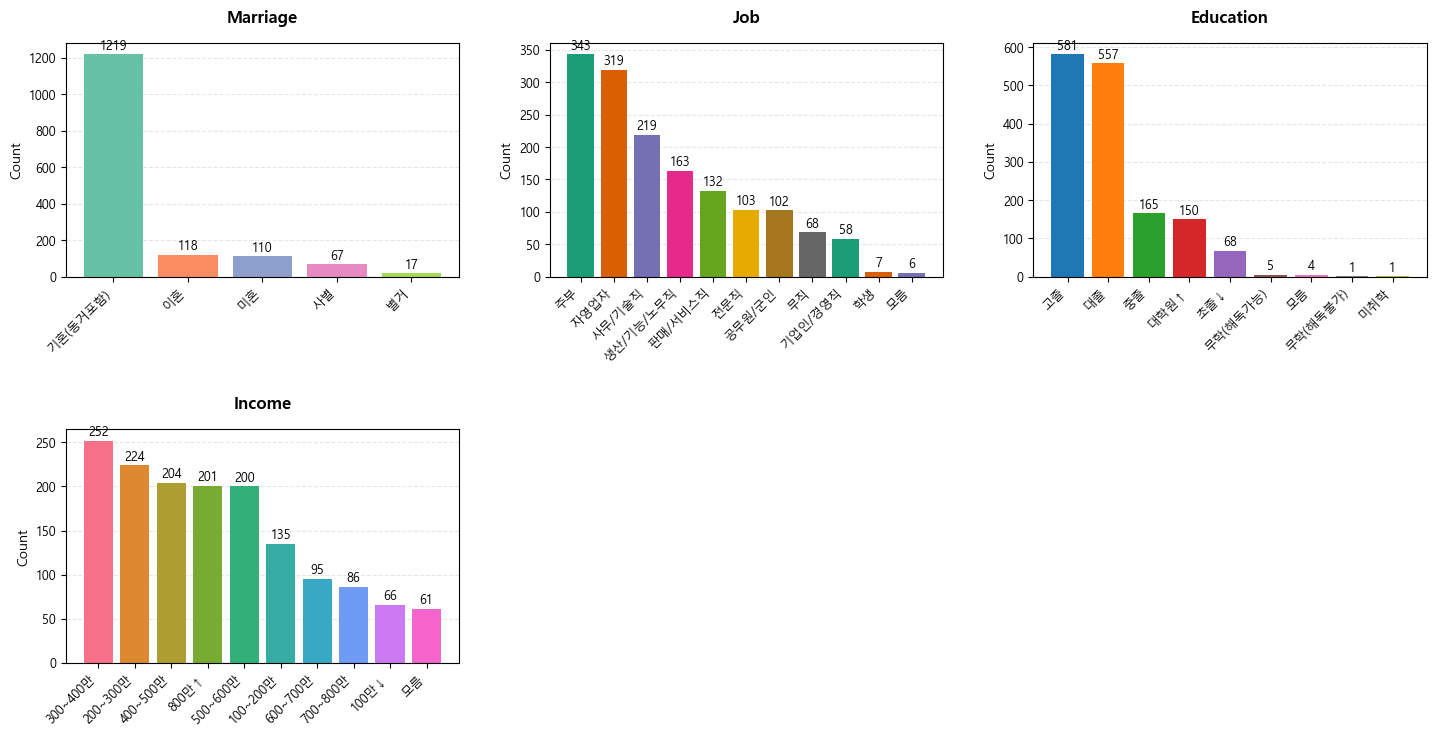

그래프가 저장되었습니다: plots/disease_distribution.png


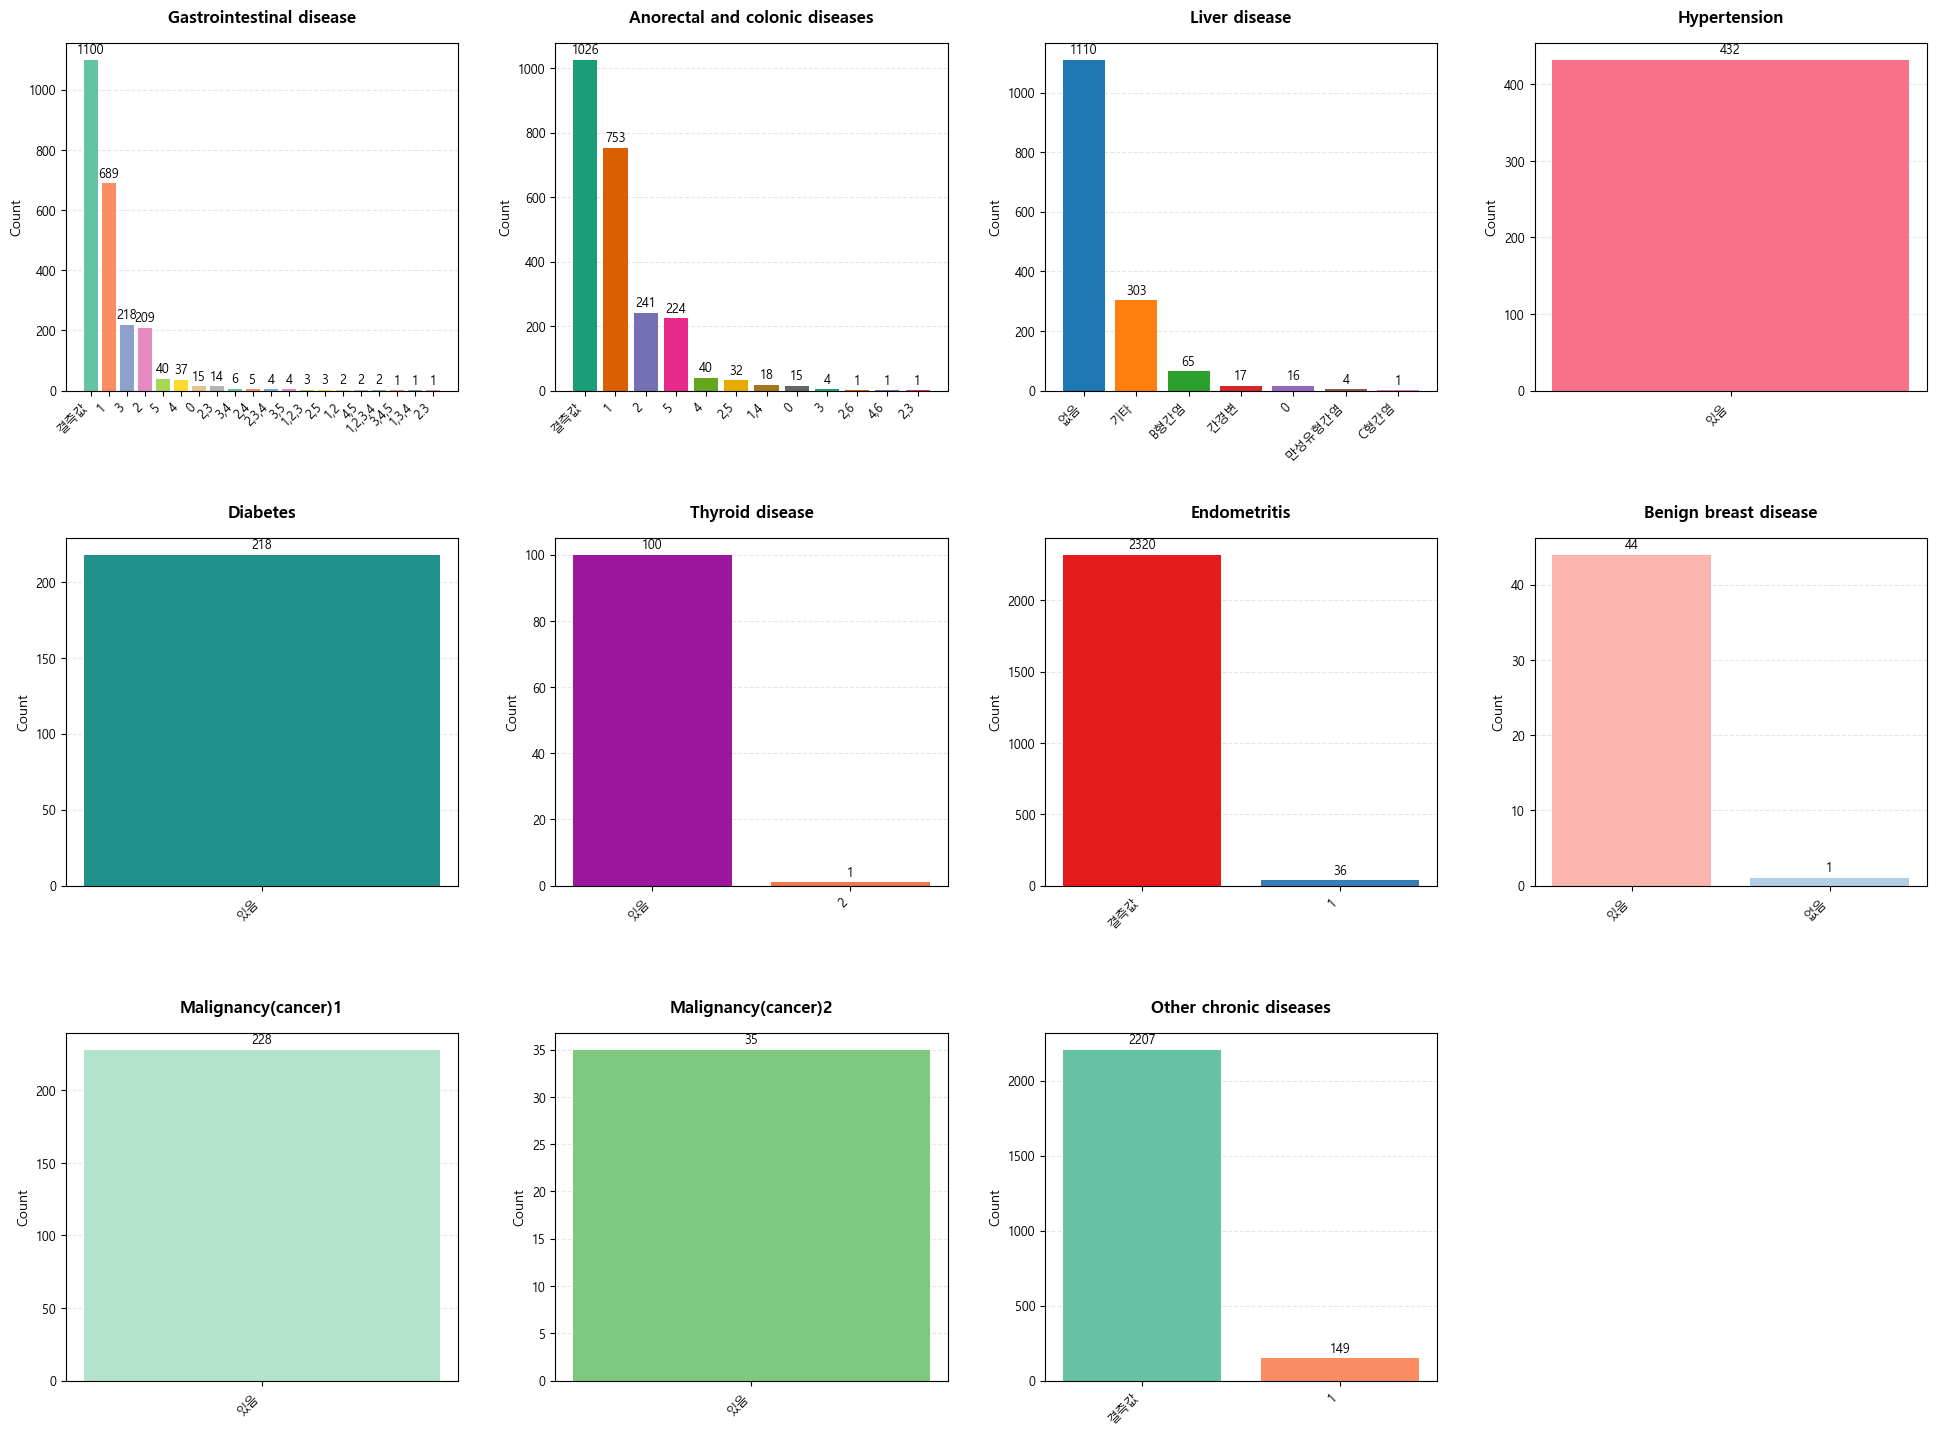

그래프가 저장되었습니다: plots/lifestyle_distribution.png


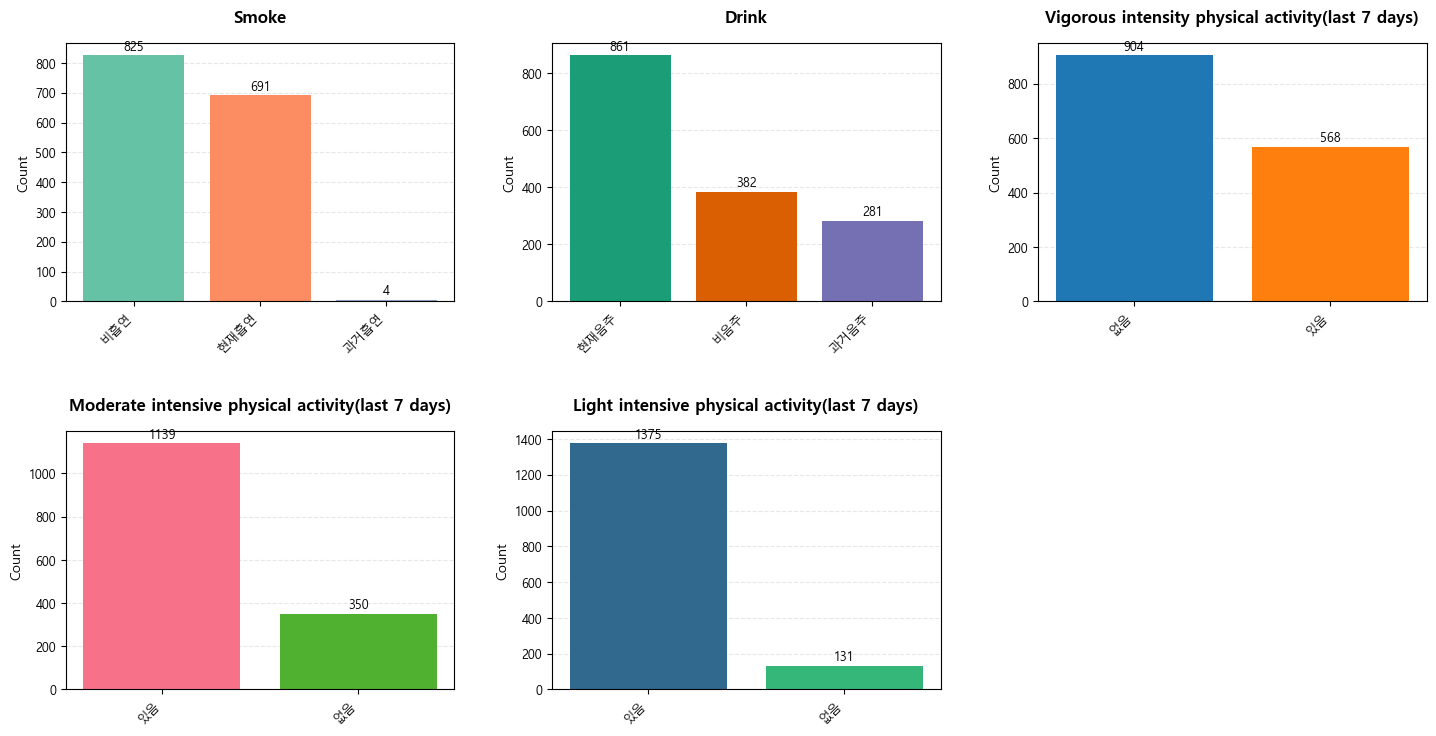

그래프가 저장되었습니다: plots/oral_health_distribution.png


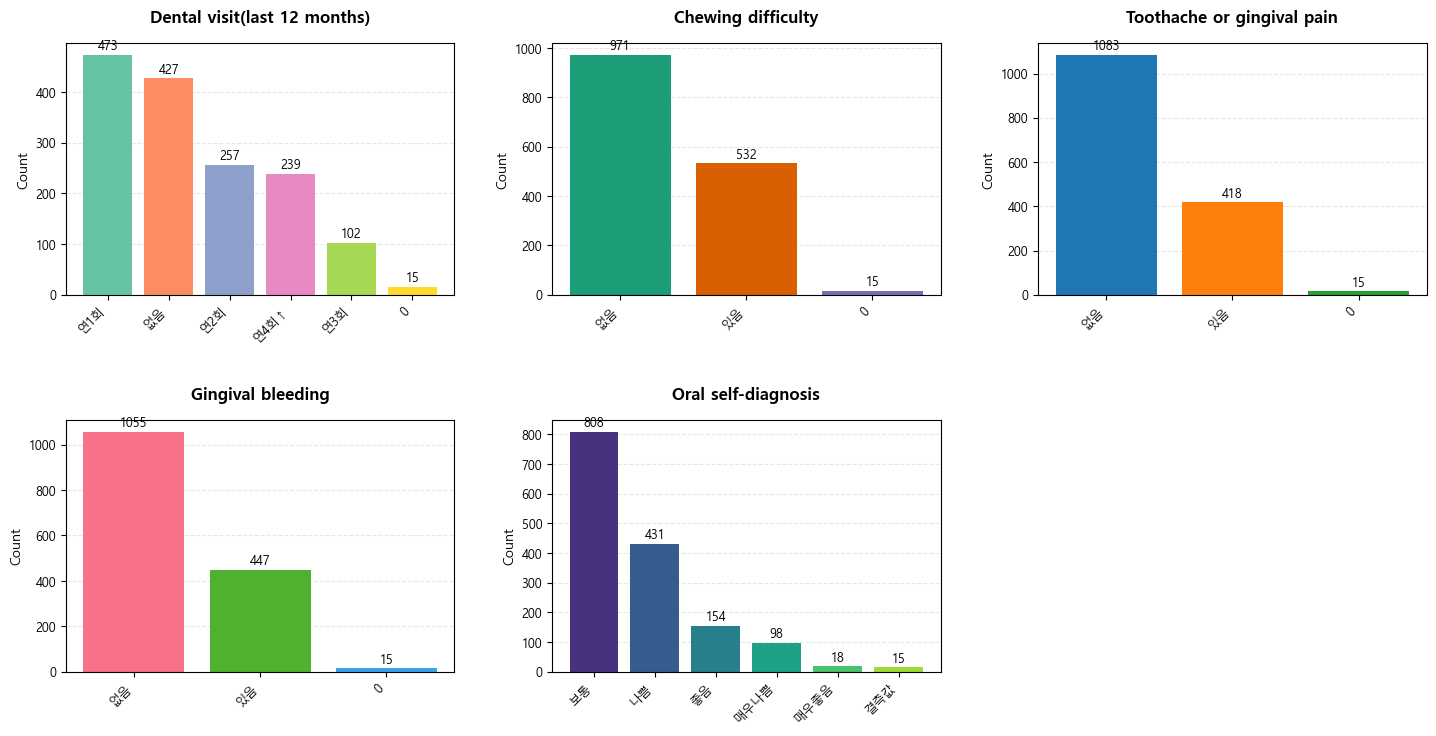

그래프가 저장되었습니다: plots/diet_distribution.png


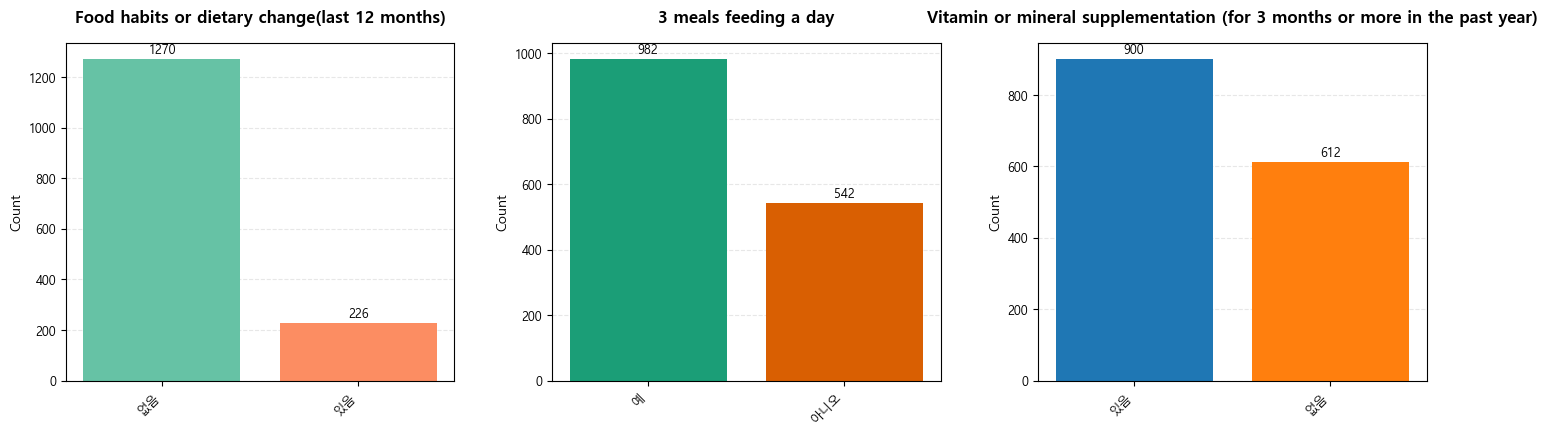

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 한국어 표시
plt.rc('font', family='Malgun Gothic')  # Windows에서 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시 문제 해결
# 변수별 custom label (카테고리 숫자 -> 한글 라벨)
custom_labels = {
    "MAR": {
        0: "결측값",
        "1": "미혼", 
        "2": "기혼(동거포함)",
        "3": "이혼",
        "4": "별거", 
        "5": "사별"
    },
    "JOB": {
        0: "결측값",
        "1": "공무원/군인", 
        "2": "기업인/경영직",
        "3": "사무/기술직",
        "4": "판매/서비스직",
        "5": "생산/기능/노무직",
        "6": "전문직",
        "7": "자영업자",
        "8": "학생",
        "9": "주부",
        "10": "무직",
        "11": "비해당",
        "12": "모름"
    },
    "EDU": {
        0: "결측값",
        "1": "미취학",
        "2": "무학(해독불가)",
        "3": "무학(해독가능)",
        "4": "초졸↓",
        "5": "중졸",
        "6": "고졸",
        "7": "대졸",
        "8": "대학원↑",
        "9": "모름"
    },
    "INC": {
        0: "결측값",
        "1": "100만↓", 
        "2": "100~200만",
        "3": "200~300만",
        "4": "300~400만",
        "5": "400~500만",
        "6": "500~600만",
        "7": "600~700만",
        "8": "700~800만",
        "9": "800만↑",
        "10": "모름"
    },
    "GAS": {
        0: "결측값",
        "1": "없음",
        "2": "위궤양",
        "3": "위축성위염",
        "4": "장상피화생",
        "5": "위용종",
        "6": "기타",
    },
    "ANO": {
        0: "결측값",
        "1": "없음",
        "2": "대장용종",
        "3": "궤양성대장염",
        "4": "크론병",
        "5": "치질",
        "6": "기타"
    },
    "LIV": {
        0: "결측값",
        "1": "없음",
        "2": "B형간염",
        "3": "만성유형간염",
        "4": "C형간염",
        "5": "간경변",
        "6": "기타",
    },
    "DIG": {
        0: "결측값",
        "1": "없음",
        "2": "있음",
    },
    "HYP": {"0": "없음", "1": "있음"},
    "DIA": {"0": "없음", "1": "있음"},
    "THY": {"0": "없음", "1": "있음"},
    "END": {"0": "없음", "1": "있음"},
    "BBD": {"0": "없음", "1": "있음"},
    "MAL1": {"0": "없음", "1": "있음"},
    "MAL2": {"0": "없음", "1": "있음"},
    "OCD": {"0": "없음", "1": "있음"},
    "SMO": {
        0: "결측값",
        "1": "비흡연",
        "2": "현재흡연",
        "3": "과거흡연"
    },
    "DRI": {
        0: "결측값",
        "1": "비음주",
        "2": "현재음주",
        "3": "과거음주"
    },
    "VIA": {0: "결측값", "1": "있음", "2": "없음"},
    "MIA": {0: "결측값", "1": "있음", "2": "없음"},
    "LIA": {0: "결측값", "1": "있음", "2": "없음"},
    "DEN": {
        0: "결측값",
        "1": "없음",
        "2": "연1회",
        "3": "연2회",
        "4": "연3회",
        '5': "연4회↑",
    },
    "CHE": {0: "결측값", "1": "있음", "2": "없음"},
    "TOO": {0: "결측값", "1": "있음", "2": "없음"},
    "GIN": {0: "결측값", "1": "있음", "2": "없음"},
    "ORA": {
        0: "결측값",
        "0": "결측값",
        "1": "매우좋음",
        "2": "좋음",
        "3": "보통",
        "4": "나쁨",
        "5": "매우나쁨"
    },
    "FHD": {"0": "결측값", "1": "있음", "2": "없음"},
    "MFD": {"0": "결측값", "1": "예", "2": "아니오"},
    "VIM": {0: "결측값", "1": "있음", "2": "없음"}
}

# 변수명 딕셔너리 (약어 -> 전체 이름)
variable_labels = {
    'MAR': 'Marriage',
    'JOB': 'Job', 
    'EDU': 'Education',
    'INC': 'Income',
    'GAS': 'Gastrointestinal disease',
    'ANO': 'Anorectal and colonic diseases',
    'LIV': 'Liver disease',
    'DIG': 'Disease History',
    'HYP': 'Hypertension',
    'DIA': 'Diabetes',
    'THY': 'Thyroid disease',
    'END': 'Endometritis',
    'BBD': 'Benign breast disease',
    'MAL1': 'Malignancy(cancer)1',
    'MAL2': 'Malignancy(cancer)2',
    'OCD': 'Other chronic diseases',
    'SMO': 'Smoke',
    'DRI': 'Drink',
    'VIA': 'Vigorous intensity physical activity(last 7 days)',
    'MIA': 'Moderate intensive physical activity(last 7 days)',
    'LIA': 'Light intensive physical activity(last 7 days)',
    'DEN': 'Dental visit(last 12 months)',
    'CHE': 'Chewing difficulty',
    'TOO': 'Toothache or gingival pain',
    'GIN': 'Gingival bleeding',
    'ORA': 'Oral self-diagnosis',
    'FHD': 'Food habits or dietary change(last 12 months)',
    'MFD': '3 meals feeding a day',
    'VIM': 'Vitamin or mineral supplementation (for 3 months or more in the past year)'
}

### Category 별 데이터 분포 확인 (개선된 버전)
def plot_category_distribution(df, category_vars, title_prefix="", figsize=(15, 10), save_path=None):
    """
    주어진 카테고리 변수들의 분포를 시각화합니다. 
    subplot을 사용하여 각 변수의 분포를 한 화면에 표시하며, 
    다양한 색상과 개선된 레이아웃을 제공합니다.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        분석할 데이터프레임
    category_vars : list
        시각화할 카테고리 변수 리스트
    title_prefix : str
        제목에 추가할 접두사 (예: "질병 관련", "생활습관" 등)
    figsize : tuple
        그래프 크기 (width, height)
    save_path : str
        저장할 파일 경로 (예: "plots/demographic_distribution.png")
    """
    
    # 변수 개수에 따라 subplot 구성 자동 조정
    n_vars = len(category_vars)
    if n_vars <= 3:
        nrows, ncols = 1, n_vars
        figsize = (5 * n_vars, 5)
    elif n_vars <= 6:
        nrows, ncols = 2, 3
        figsize = (15, 8)
    elif n_vars <= 9:
        nrows, ncols = 3, 3
        figsize = (15, 12)
    else:
        nrows = (n_vars + 3) // 4
        ncols = 4
        figsize = (20, 5 * nrows)
    
    # 다양한 색상 팔레트 정의
    color_palettes = [
        'Set2',           # 부드러운 파스텔 톤
        'Dark2',          # 진한 색상
        'tab10',          # 기본 matplotlib 색상
        'husl',           # 밝고 다양한 색상
        'viridis',        # 그라데이션
        'plasma',         # 보라-분홍 그라데이션
        'Set1',           # 선명한 색상
        'Pastel1',        # 연한 파스텔
        'Pastel2',        # 파스텔 2
        'Accent'          # 강조 색상
    ]
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    # axes를 1차원 배열로 변환 (단일 subplot인 경우 처리)
    if n_vars == 1:
        axes = [axes]
    elif nrows == 1 or ncols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(category_vars):
        # 해당 변수의 데이터가 존재하는지 확인
        if var not in df.columns:
            print(f"Warning: {var} column not found in DataFrame")
            continue
            
        # 결측값 제외하고 값 개수 계산
        value_counts = df[var].value_counts()
        
        if len(value_counts) == 0:
            print(f"Warning: No data found for {var}")
            continue
        # 색상 팔레트 선택 (변수마다 다른 팔레트 사용)
        palette = color_palettes[i % len(color_palettes)]
        
        # 카테고리 수에 따라 색상 개수 조정
        n_categories = len(value_counts)
        if palette in ['viridis', 'plasma']:
            colors = sns.color_palette(palette, n_categories)
        else:
            colors = sns.color_palette(palette, max(n_categories, 3))[:n_categories]
        
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, color = colors)
        
        x_labels = []
        for encoded_val in value_counts.index:
            if custom_labels and var in custom_labels and encoded_val in custom_labels[var]:
                x_labels.append(custom_labels[var][encoded_val])
            elif encoder and var in encoder.mapping_dict:
                reverse_mapping = {v: k for k, v in encoder.mapping_dict[var].items()}
                label = reverse_mapping.get(encoded_val, str(encoded_val))
                if label == "NA":
                    label = "결측값"
                x_labels.append(label)
            else:
                x_labels.append(str(encoded_val))
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(x_labels, rotation=45, ha='right')
        
        # 제목 및 레이블 설정
        full_name = variable_labels.get(var, var)
        axes[i].set_title(f"{full_name}", fontsize=12, fontweight='bold', pad=15)
        axes[i].set_ylabel('Count', fontsize=10)
        
        # 레이블 크기 조정
        axes[i].tick_params(axis='x', labelsize=9)
        axes[i].tick_params(axis='y', labelsize=9)
        
        # 값 표시 (막대 위에 숫자)
        for j, (encoded_val, count) in enumerate(value_counts.items()):
            axes[i].text(j, count + max(value_counts.values) * 0.01, 
                        str(count), ha='center', va='bottom', fontsize=9)
        
        # 격자 추가
        axes[i].grid(axis='y', alpha=0.3, linestyle='--')
        axes[i].set_axisbelow(True)
    
    # 빈 subplot 제거
    for i in range(len(category_vars), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout(pad=3.0)
    
    # 그래프 저장
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        print(f"그래프가 저장되었습니다: {save_path}")
    
    plt.show()

# 사용 예시 (기존 코드 대체)
def plot_all_categories(df, demographic_vars, disease_vars, lifestyle_vars, 
                       oral_health_vars, diet_vars, save_dir=None):
    """
    모든 카테고리 변수들을 그룹별로 시각화합니다.
    
    Parameters:
    -----------
    save_dir : str
        저장할 디렉토리 경로 (예: "plots/")
    """
    import os
    
    # 저장 디렉토리 생성
    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    save_paths = os.path.join(base_dir,"plots")
    if not os.path.exists(save_paths):
        os.makedirs(save_paths)
    if save_dir:
        save_paths = {
            'demographic': os.path.join(save_dir, 'demographic_distribution.png'),
            'disease': os.path.join(save_dir, 'disease_distribution.png'),
            'lifestyle': os.path.join(save_dir, 'lifestyle_distribution.png'),
            'oral_health': os.path.join(save_dir, 'oral_health_distribution.png'),
            'diet': os.path.join(save_dir, 'diet_distribution.png')
        }
    
    plot_category_distribution(df, demographic_vars, "인구통계학적", 
                              save_path=save_paths['demographic'] if save_paths else None)
    plot_category_distribution(df, disease_vars, "질병 관련",
                              save_path=save_paths['disease'] if save_paths else None)  
    plot_category_distribution(df, lifestyle_vars, "생활습관",
                              save_path=save_paths['lifestyle'] if save_paths else None)
    plot_category_distribution(df, oral_health_vars, "구강건강",
                              save_path=save_paths['oral_health'] if save_paths else None)
    plot_category_distribution(df, diet_vars, "식습관",
                              save_path=save_paths['diet'] if save_paths else None)

plot_all_categories(processed_encoded, demographic_vars, disease_vars, 
                   lifestyle_vars, oral_health_vars, diet_vars, save_dir="plots/")


In [14]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
def chi_square_analysis(df, cancer_col='암종', variables_list=None, alpha=0.05):
    """
    각 변수와 암종 간의 연관성을 카이제곱 검정으로 분석합니다.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        분석할 데이터프레임
    cancer_col : str
        암종 컬럼명 (기본값: '암종')
    variables_list : list
        분석할 변수 리스트
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns:
    --------
    pandas.DataFrame
        카이제곱 검정 결과가 담긴 데이터프레임
    """
    
    if variables_list is None:
        variables_list = demographic_vars + disease_vars + lifestyle_vars + oral_health_vars + diet_vars
    
    results = []
    
    print("=" * 80)
    print(f"카이제곱 검정 결과: {cancer_col}과 각 변수 간의 연관성 분석")
    print("=" * 80)
    
    for var in variables_list:
        try:
            # 결측값 제거
            df_clean = df[[var, cancer_col]].dropna()
            
            if len(df_clean) == 0:
                print(f"⚠️  {var}: 데이터가 없습니다.")
                continue
            
            # 분할표 생성
            contingency_table = pd.crosstab(df_clean[var], df_clean[cancer_col])
            
            # 최소 빈도 체크 (모든 셀이 5 이상이어야 함)
            min_frequency = contingency_table.min().min()
            
            if min_frequency < 5:
                print(f"⚠️  {var}: 기대빈도가 5 미만인 셀이 있습니다. (최소값: {min_frequency})")
                # Fisher's exact test를 고려할 수 있지만, 여기서는 경고만 출력
            
            # 카이제곱 검정 수행
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # 효과 크기 계산 (Cramér's V)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            
            # 유의성 판단
            is_significant = p_value < alpha
            significance_mark = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
            
            # 변수명 변환
            var_name = variable_labels.get(var, var)
            
            # 결과 저장
            results.append({
                'Variable': var,
                'Variable_Name': var_name,
                'Chi2': chi2,
                'p_value': p_value,
                'df': dof,
                'Cramers_V': cramers_v,
                'Significant': is_significant,
                'Sample_Size': n,
                'Min_Expected_Freq': expected.min()
            })
            
            # 결과 출력
            print(f"{var_name:35} | Chi2: {chi2:8.3f} | p-value: {p_value:8.4f}{significance_mark:3} | "
                  f"Cramér's V: {cramers_v:.3f} | n: {n:4d}")
            
        except Exception as e:
            print(f"❌ {var}: 오류 발생 - {str(e)}")
            continue
    
    print("\n" + "=" * 80)
    print("유의수준: *** p<0.001, ** p<0.01, * p<0.05")
    print("Cramér's V 해석: 0.1(작음), 0.3(중간), 0.5(큼)")
    print("=" * 80)
    
    # 결과 DataFrame 생성
    results_df = pd.DataFrame(results)
    if not results_df.empty:
        results_df = results_df.sort_values('p_value')
    
    return results_df

def display_significant_results(results_df, alpha=0.05):
    """유의한 결과만 따로 표시합니다."""
    
    significant_results = results_df[results_df['Significant'] == True]
    
    if len(significant_results) > 0:
        print(f"\n🎯 유의한 연관성이 발견된 변수들 (p < {alpha}):")
        print("-" * 60)
        
        for _, row in significant_results.iterrows():
            effect_size = "큼" if row['Cramers_V'] >= 0.5 else "중간" if row['Cramers_V'] >= 0.3 else "작음"
            print(f"• {row['Variable_Name']:35} | p = {row['p_value']:.4f} | "
                  f"효과크기: {effect_size} (V={row['Cramers_V']:.3f})")
    else:
        print(f"\n❌ 유의한 연관성이 발견된 변수가 없습니다 (p < {alpha})")

# 사용 예시
if __name__ == "__main__":
    # 전체 변수 리스트 정의 (필요에 따라 수정)
    all_variables = demographic_vars + disease_vars + lifestyle_vars + oral_health_vars + diet_vars
    
    # 카이제곱 검정 수행
    chi2_results = chi_square_analysis(processed_encoded, 
                                      cancer_col='암종', 
                                      variables_list=all_variables)
    
    # 유의한 결과 표시
    display_significant_results(chi2_results)


카이제곱 검정 결과: 암종과 각 변수 간의 연관성 분석
⚠️  MAR: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Marriage                            | Chi2:   68.199 | p-value:   0.0000*** | Cramér's V: 0.106 | n: 1531
⚠️  JOB: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Job                                 | Chi2:  227.095 | p-value:   0.0000*** | Cramér's V: 0.146 | n: 1520
⚠️  EDU: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Education                           | Chi2:  128.574 | p-value:   0.0000*** | Cramér's V: 0.109 | n: 1532
⚠️  INC: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Income                              | Chi2:   99.773 | p-value:   0.0022**  | Cramér's V: 0.097 | n: 1524
⚠️  GAS: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Gastrointestinal disease            | Chi2: 1115.273 | p-value:   0.0000*** | Cramér's V: 0.260 | n: 2356
⚠️  ANO: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Anorectal and colonic diseases      | Chi2: 1299.193 | p-value:   0.0000*** | Cramér's V: 0.281 | n: 2356
⚠️  LIV: 기대빈도가 5 미만인 셀이 있습니다. (최소값: 0)
Liver disease                       | Chi2:  832.516 | p-val

C:\Users\yoon\AppData\Local\Temp\ipykernel_46548\3427061693.py:57: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\yoon\AppData\Local\Temp\ipykernel_46548\3427061693.py:57: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\yoon\AppData\Local\Temp\ipykernel_46548\3427061693.py:57: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\yoon\AppData\Local\Temp\ipykernel_46548\3427061693.py:57: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


In [15]:
chi2_results

,Variable,Variable_Name,Chi2,p_value,df,Cramers_V,Significant,Sample_Size,Min_Expected_Freq
5,ANO,Anorectal and colonic diseases,1299.193160,2.860949e-221,77,0.280673,True,2356,0.009762
4,GAS,Gastrointestinal disease,1115.272506,8.639966e-155,133,0.260048,True,2356,0.009762
6,LIV,Liver disease,832.516062,1.753442e-147,42,0.302532,True,1516,0.011873
22,TOO,Toothache or gingival pain,327.259425,2.390451e-61,14,0.328535,True,1516,0.178100
21,CHE,Chewing difficulty,324.162223,1.062689e-60,14,0.326761,True,1518,0.177866
23,GIN,Gingival bleeding,309.871565,1.030052e-57,14,0.319583,True,1517,0.177983
24,ORA,Oral self-diagnosis,339.361038,1.618419e-51,35,0.211035,True,1524,0.177165
20,DEN,Dental visit(last 12 months),307.824983,2.306196e-45,35,0.201719,True,1513,0.178453
15,SMO,Smoke,219.170654,6.502725e-39,14,0.268506,True,1520,0.047368
16,DRI,Drink,125.820015,4.531829e-20,14,0.203174,True,1524,3.134514


## Logistic Regression with L1 Regularization


In [16]:
processed_encoded.fillna(0, inplace=True)

C:\Users\yoon\AppData\Local\Temp\ipykernel_46548\369198468.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  processed_encoded.fillna(0, inplace=True)


In [17]:
processed_encoded.drop(columns=['등재날짜'], axis=1, inplace=True)

In [18]:
processed_df.groupby("BBD").count()

,암종,등재날짜,Site,Stage,WBC,RBC,Hb,Hct,MCV,MCH,...,MIA,LIA,DEN,CHE,TOO,GIN,ORA,FHD,MFD,VIM
BBD,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,8,44,5,5,13,13,44,13,13,13,...,42,44,44,44,44,44,44,44,44,44


In [19]:
processed_encoded.dtypes

암종         int64
Site       int64
Stage      int64
WBC      float64
RBC      float64
          ...   
GIN       object
ORA       object
FHD       object
MFD       object
VIM       object
Length: 65, dtype: object

In [20]:
from LRwithL1Regularization import L1LogisticRegression
model = L1LogisticRegression(target_col='암종')

# 2. 단계별 실행
model.step1_check_data(processed_encoded)


🎯 L1 로지스틱 회귀분석 객체 생성됨
   타겟 변수: 암종
   랜덤 시드: 42
   💡 LabelEncoderWithNA + fillna(0) 처리된 데이터를 위한 특별 버전

🔍 1단계: 데이터 상태 확인
📊 데이터프레임 크기: (2356, 65)
📊 타겟 변수: 암종

🎯 암종 분포:
----------------------------------------
  0: 1148개 (48.7%)
  1: 278개 (11.8%)
  2: 23개 (1.0%)
  3: 72개 (3.1%)
  4: 234개 (9.9%)
  5: 41개 (1.7%)
  6: 243개 (10.3%)
  7: 317개 (13.5%)
⚠️  클래스 불균형 주의! 최소/최대 비율: 0.020

🔍 결측값 현황:
------------------------------
  ✅ 결측값 없음

📋 데이터 타입 및 인코딩 현황:
--------------------------------------------------
  WBC: 647개 고유값
  RBC: 283개 고유값
  Hb: 106개 고유값
  Hct: 259개 고유값
  MCV: 240개 고유값
  MCH: 127개 고유값
  MCHC: 70개 고유값
  RDW: 90개 고유값
  PLT: 330개 고유값
  PCT: 52개 고유값
  MPV: 67개 고유값
  PDW: 93개 고유값
  ESR: 85개 고유값
  Myelocyte: 8개 → [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(4.0), np.float64(3.0)]
  Metamyelocyte: 11개 고유값
  Band neutrophil: 12개 고유값
  Segmented neutrophil: 494개 고유값

📊 데이터 타입 요약:
  수치형 컬럼: 17개
  타입 혼재: 0개

✅ 1단계 완료. 정제된 데이터: (2356, 65)


,암종,Site,Stage,WBC,RBC,Hb,Hct,MCV,MCH,MCHC,...,MIA,LIA,DEN,CHE,TOO,GIN,ORA,FHD,MFD,VIM
pat_no,,,,,,,,,,,,,,,,,,,,,
H1310020,7,34,20,11.20,3.34,10.0,30.1,90.1,29.9,33.2,...,0,0,0,0,0,0,0,0,0,0
H1310021,7,91,14,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
H1310022,7,34,20,5.79,4.60,14.0,41.9,91.1,30.4,33.4,...,0,0,0,0,0,0,0,0,0,0
H1310024,7,9,14,10.90,4.07,12.9,37.7,92.6,31.7,34.2,...,2,1,0,0,0,0,0,2,0,2
H1310025,7,91,8,5.43,5.26,15.3,45.3,86.1,29.1,33.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H1901041,0,0,0,0.00,0.00,16.1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
H1901042,0,0,0,0.00,0.00,15.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,3,2,1,2
H1901043,0,0,0,0.00,0.00,13.0,0.0,0.0,0.0,0.0,...,2,1,2,2,1,0,3,2,1,1


In [21]:
model.step2_prepare_data(processed_encoded)


🔄 2단계: 데이터 전처리 (수치형/카테고리형 구분)
📊 사용할 feature: 65개
📊 변수 타입 분류:
  수치형 변수: 32개
  카테고리형 변수: 33개

🔢 수치형 변수 처리 중...
  수치형 데이터 형태: (2356, 32)

🏷️  카테고리형 변수 처리 중...
  MAR: 문자열로 통일 변환 (0 → '0')
  JOB: 문자열로 통일 변환 (0 → '0')
  EDU: 문자열로 통일 변환 (0 → '0')
  INC: 문자열로 통일 변환 (0 → '0')
  LIV: 문자열로 통일 변환 (0 → '0')
  DIG: 문자열로 통일 변환 (0 → '0')
  HYP: 문자열로 통일 변환 (0 → '0')
  DIA: 문자열로 통일 변환 (0 → '0')
  THY: 문자열로 통일 변환 (0 → '0')
  BBD: 문자열로 통일 변환 (0 → '0')
  MAL1: 문자열로 통일 변환 (0 → '0')
  MAL2: 문자열로 통일 변환 (0 → '0')
  SMO: 문자열로 통일 변환 (0 → '0')
  DRI: 문자열로 통일 변환 (0 → '0')
  VIA: 문자열로 통일 변환 (0 → '0')
  MIA: 문자열로 통일 변환 (0 → '0')
  LIA: 문자열로 통일 변환 (0 → '0')
  DEN: 문자열로 통일 변환 (0 → '0')
  CHE: 문자열로 통일 변환 (0 → '0')
  TOO: 문자열로 통일 변환 (0 → '0')
  GIN: 문자열로 통일 변환 (0 → '0')
  ORA: 문자열로 통일 변환 (0 → '0')
  FHD: 문자열로 통일 변환 (0 → '0')
  MFD: 문자열로 통일 변환 (0 → '0')
  VIM: 문자열로 통일 변환 (0 → '0')
  카테고리형 데이터 형태: (2356, 33)

🔄 카테고리형 변수 원-핫 인코딩 중...
  원-핫 인코딩 후: (2356, 92)

🔗 수치형과 카테고리형 데이터 결합 중...
📊 최종 feature 수: 124개
  - 수치형: 32개
  - 카

(            WBC   RBC    Hb   Hct   MCV   MCH  MCHC   RDW    PLT   PCT  ...  \
 pat_no                                                                  ...   
 H1310020  11.20  3.34  10.0  30.1  90.1  29.9  33.2  12.9  162.0  0.16  ...   
 H1310021   0.00  0.00   0.0   0.0   0.0   0.0   0.0   0.0    0.0  0.00  ...   
 H1310022   5.79  4.60  14.0  41.9  91.1  30.4  33.4  12.8  234.0  0.25  ...   
 H1310024  10.90  4.07  12.9  37.7  92.6  31.7  34.2  12.8  158.0  0.16  ...   
 H1310025   5.43  5.26  15.3  45.3  86.1  29.1  33.8  12.7  195.0  0.19  ...   
 ...         ...   ...   ...   ...   ...   ...   ...   ...    ...   ...  ...   
 H1901041   0.00  0.00  16.1   0.0   0.0   0.0   0.0   0.0    0.0  0.00  ...   
 H1901042   0.00  0.00  15.0   0.0   0.0   0.0   0.0   0.0    0.0  0.00  ...   
 H1901043   0.00  0.00  13.0   0.0   0.0   0.0   0.0   0.0    0.0  0.00  ...   
 H1901044   0.00  0.00  12.9   0.0   0.0   0.0   0.0   0.0    0.0  0.00  ...   
 H1901045   0.00  0.00  13.4   0.0   0.0

In [22]:
model.step3_explain_c_parameter()


📚 3단계: C 파라미터 이해하기
L1 로지스틱 회귀에서 C는 '정규화 강도의 역수'입니다.

🔹 C가 클수록 (예: C=100)
   → 정규화 약함 → 더 많은 특성 사용 → 복잡한 모델
   → 과적합 위험 증가, 하지만 훈련 데이터에 잘 맞음

🔹 C가 작을수록 (예: C=0.01)
   → 정규화 강함 → 적은 특성 사용 → 간단한 모델
   → 언더피팅 위험 증가, 하지만 일반화 성능 좋음

🎯 목표: 적절한 C 값으로 편향-분산 트레이드오프 최적화!

📐 수식:
   Cost = 로지스틱 손실 + (1/C) × Σ|계수|
   여기서 Σ|계수|가 L1 정규화 항 (Lasso)

💡 L1 정규화의 특징:
   - 일부 계수를 정확히 0으로 만듦 → 자동 특성 선택
   - 중요하지 않은 변수들이 모델에서 제거됨
   - 해석하기 쉬운 sparse한 모델 생성



🎯 4단계: 최적 C 값 탐색
테스트할 C 값들: [0.001, 0.01, 0.1, 1, 10]
교차검증 fold: 5
데이터 크기: (2356, 124)

✅ 데이터 스케일링 완료
   (로지스틱 회귀는 특성 스케일에 민감하므로 반드시 필요)

📊 C 값별 교차검증 결과:
-------------------------------------------------------
    C 값    |  평균 정확도  |  표준편차  |  특성 수
-------------------------------------------------------
     0.001  |   0.4873   |  0.0009  |     0
     0.010  |   0.7071   |  0.0027  |    28
     0.100  |   0.9024   |  0.0162  |   205
     1.000  |   0.9206   |  0.0131  |   507
    10.000  |   0.9113   |  0.0146  |   656
-------------------------------------------------------

🏆 최적 결과:
   최적 C: 1
   최고 정확도: 0.9206 (±0.0131)
   선택된 특성 수: 507개 / 124개


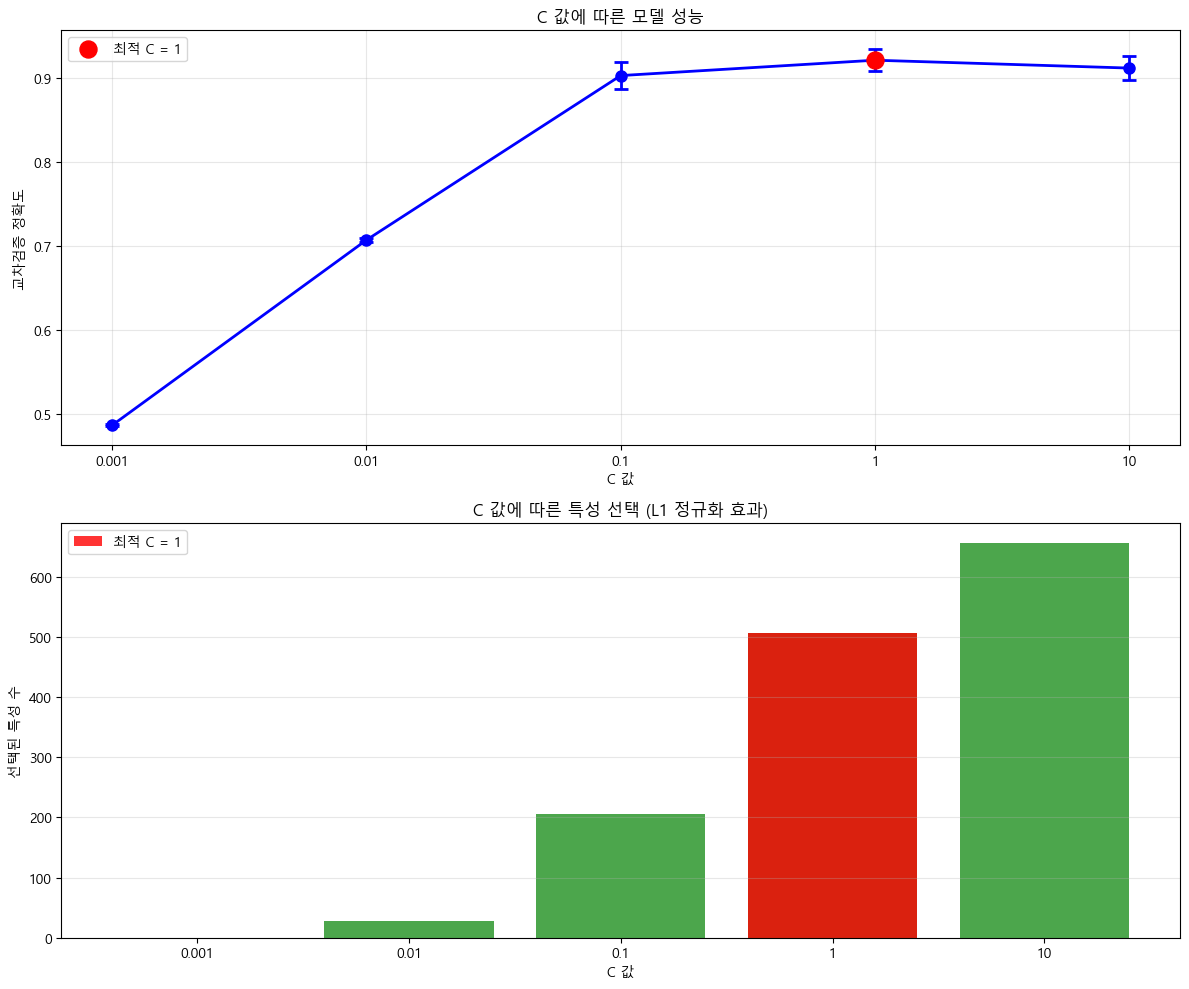

(1,
 [{'C': 0.001,
   'mean_accuracy': np.float64(0.4872665443160963),
   'std_accuracy': np.float64(0.000949559449960742),
   'cv_scores': array([0.48728814, 0.48832272, 0.48619958, 0.48619958, 0.48832272]),
   'selected_features': np.int64(0)},
  {'C': 0.01,
   'mean_accuracy': np.float64(0.7071305192702149),
   'std_accuracy': np.float64(0.0026970401480345225),
   'cv_scores': array([0.70762712, 0.71125265, 0.70700637, 0.70700637, 0.70276008]),
   'selected_features': np.int64(28)},
  {'C': 0.1,
   'mean_accuracy': np.float64(0.9023687430278169),
   'std_accuracy': np.float64(0.016208795280438296),
   'cv_scores': array([0.92161017, 0.91507431, 0.89808917, 0.87473461, 0.90233546]),
   'selected_features': np.int64(205)},
  {'C': 1,
   'mean_accuracy': np.float64(0.9206223685631005),
   'std_accuracy': np.float64(0.013089447613075409),
   'cv_scores': array([0.93432203, 0.93418259, 0.92356688, 0.90233546, 0.90870488]),
   'selected_features': np.int64(507)},
  {'C': 10,
   'mean_accu

In [23]:
model.step4_find_optimal_c(cv_folds=5)

In [25]:
processed_encoded.drop(columns='Site',axis=1)

,암종,Stage,WBC,RBC,Hb,Hct,MCV,MCH,MCHC,RDW,...,MIA,LIA,DEN,CHE,TOO,GIN,ORA,FHD,MFD,VIM
pat_no,,,,,,,,,,,,,,,,,,,,,
H1310020,7,20,11.20,3.34,10.0,30.1,90.1,29.9,33.2,12.9,...,0,0,0,0,0,0,0,0,0,0
H1310021,7,14,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
H1310022,7,20,5.79,4.60,14.0,41.9,91.1,30.4,33.4,12.8,...,0,0,0,0,0,0,0,0,0,0
H1310024,7,14,10.90,4.07,12.9,37.7,92.6,31.7,34.2,12.8,...,2,1,0,0,0,0,0,2,0,2
H1310025,7,8,5.43,5.26,15.3,45.3,86.1,29.1,33.8,12.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H1901041,0,0,0.00,0.00,16.1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
H1901042,0,0,0.00,0.00,15.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,3,2,1,2
H1901043,0,0,0.00,0.00,13.0,0.0,0.0,0.0,0.0,0.0,...,2,1,2,2,1,0,3,2,1,1


In [31]:
processed_encoded

,암종,Site,Stage,WBC,RBC,Hb,Hct,MCV,MCH,MCHC,...,LIA,DEN,CHE,TOO,GIN,ORA,FHD,MFD,VIM,site
pat_no,,,,,,,,,,,,,,,,,,,,,
H1310020,7,34,20,11.20,3.34,10.0,30.1,90.1,29.9,33.2,...,0,0,0,0,0,0,0,0,0,34
H1310021,7,91,14,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,91
H1310022,7,34,20,5.79,4.60,14.0,41.9,91.1,30.4,33.4,...,0,0,0,0,0,0,0,0,0,34
H1310024,7,9,14,10.90,4.07,12.9,37.7,92.6,31.7,34.2,...,1,0,0,0,0,0,2,0,2,9
H1310025,7,91,8,5.43,5.26,15.3,45.3,86.1,29.1,33.8,...,0,0,0,0,0,0,0,0,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H1901041,0,0,0,0.00,0.00,16.1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
H1901042,0,0,0,0.00,0.00,15.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,3,2,1,2,0
H1901043,0,0,0,0.00,0.00,13.0,0.0,0.0,0.0,0.0,...,1,2,2,1,0,3,2,1,1,0


In [30]:

# 2. L1 정규화 특성 선택 전체 과정
print("🚀 L1 정규화 특성 선택 시작")
print("=" * 60)

# 객체 생성
l1_model = L1LogisticRegression(target_col='암종', random_state=42)

# 1단계: 데이터 확인
print("\n" + "="*60)
clean_data = l1_model.step1_check_data(processed_encoded, encoder=encoder)

# 2단계: 데이터 전처리 (수치형/카테고리형 구분)
print("\n" + "="*60)
X_processed, y_processed = l1_model.step2_prepare_data()

# 3단계: C 파라미터 설명
print("\n" + "="*60)
l1_model.step3_explain_c_parameter()

# 4단계: 최적 C 값 탐색
print("\n" + "="*60)
optimal_c, cv_results = l1_model.step4_find_optimal_c(
    c_range=[0.001, 0.01, 0.1, 1, 10, 100],  # 더 넓은 범위 테스트
    cv_folds=5
)

# 5단계: 선택된 특성 추출 ⭐ 이 부분이 핵심!
print("\n" + "="*60)
l1_selected_features, feature_coefficients = l1_model.step5_extract_selected_features(
    threshold=1e-6  # 계수 임계값 (필요시 조정 가능)
)

# 6단계: 특성 중요도 분석
print("\n" + "="*60)
top_important_features = l1_model.step6_analyze_feature_importance(top_n=20)

# ===================================================================
# 결과 활용: 이제 l1_selected_features를 Naive Bayes에서 사용 가능!
# ===================================================================

print("\n" + "="*60)
print("🎯 L1 특성 선택 완료!")
print("=" * 60)

# 선택된 특성 요약
summary = l1_model.get_selected_features_summary()

print(f"📊 특성 선택 요약:")
print(f"   원본 특성 수: {summary['total_original_features']}")
print(f"   선택된 특성 수: {summary['selected_features_count']}")
print(f"   선택 비율: {summary['selection_ratio']*100:.1f}%")
print(f"   최적 C 값: {summary['best_c_parameter']}")

print(f"\n🏆 상위 10개 중요 특성:")
for i, (feature, importance) in enumerate(list(summary['feature_importance_dict'].items())[:10], 1):
    print(f"   {i:2d}. {feature}: {importance:.4f}")

# ===================================================================
# Naive Bayes 분석에 바로 사용
# ===================================================================

print(f"\n🔗 Naive Bayes 분석 연결:")
print("=" * 40)

# 이제 l1_selected_features를 사용할 수 있습니다!
print(f"✅ l1_selected_features 준비 완료: {len(l1_selected_features)}개 특성")
print(f"   사용법: nb_classifier = run_comprehensive_naive_bayes_analysis(")
print(f"             df=processed_encoded,")
print(f"             l1_features=l1_selected_features,")
print(f"             knockoff_features=ko_selected_features,")
print(f"             target_col='암종')")

# 선택된 특성 리스트 확인
print(f"\n📋 선택된 특성 목록 (처음 20개):")
for i, feature in enumerate(l1_selected_features[:20], 1):
    print(f"   {i:2d}. {feature}")

if len(l1_selected_features) > 20:
    print(f"   ... 및 {len(l1_selected_features)-20}개 더")

# ===================================================================
# 추가: 특성 선택 결과를 파일로 저장
# ===================================================================

def save_l1_results_to_excel(l1_model, filename='l1_feature_selection_results.xlsx'):
    """L1 특성 선택 결과를 Excel 파일로 저장"""
    
    if 'selected_features' not in l1_model.results:
        print("❌ 특성 선택이 완료되지 않았습니다!")
        return
    
    import pandas as pd
    
    # 1. 선택된 특성 요약
    summary = l1_model.get_selected_features_summary()
    summary_df = pd.DataFrame([summary])
    
    # 2. 모든 특성의 상세 정보
    feature_details = []
    for feature_name in l1_model.feature_names:
        coef_info = l1_model.results['feature_coefficients'][feature_name]
        
        detail = {
            'feature_name': feature_name,
            'selected': coef_info['selected'],
            'importance': coef_info.get('max_abs_coef', coef_info.get('abs_coefficient', 0))
        }
        
        # 클래스별 계수 추가
        if 'class_coefficients' in coef_info:
            detail.update(coef_info['class_coefficients'])
        elif 'coefficient' in coef_info:
            detail['coefficient'] = coef_info['coefficient']
        
        feature_details.append(detail)
    
    features_df = pd.DataFrame(feature_details)
    features_df = features_df.sort_values('importance', ascending=False)
    
    # 3. 선택된 특성만 따로
    selected_df = features_df[features_df['selected'] == True].copy()
    
    # Excel 파일로 저장
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        summary_df.to_excel(writer, sheet_name='Summary', index=False)
        selected_df.to_excel(writer, sheet_name='Selected_Features', index=False)
        features_df.to_excel(writer, sheet_name='All_Features', index=False)
    
    print(f"✅ L1 특성 선택 결과가 '{filename}'에 저장되었습니다!")
    print(f"   시트: Summary, Selected_Features, All_Features")

# 결과 저장
save_l1_results_to_excel(l1_model)

print(f"\n✅ L1 정규화 특성 선택 과정 완료!")
print(f"   이제 l1_selected_features를 Naive Bayes 분석에 사용하세요.")

# ===================================================================
# 실제 Naive Bayes 실행 예시
# ===================================================================

# Knockoff 특성이 준비되었다고 가정하고...
# ko_selected_features = [...]  # Knockoff에서 선택된 특성들

# 통합 Naive Bayes 분석 실행
print(f"\n🚀 Naive Bayes 분석 시작...")

# nb_classifier = run_comprehensive_naive_bayes_analysis(
#     df=processed_encoded,
#     l1_features=l1_selected_features,       # ⭐ 여기서 사용!
#     knockoff_features=ko_selected_features,  # Knockoff 결과
#     target_col='암종'
# )

# # 결과 저장
# nb_classifier.export_results_to_excel('cancer_classification_results.xlsx')

print(f"\n🎉 모든 과정 완료!")
print(f"   L1 선택 특성: {len(l1_selected_features)}개")
print(f"   분석 결과 파일: l1_feature_selection_results.xlsx")

🚀 L1 정규화 특성 선택 시작
🎯 L1 로지스틱 회귀분석 객체 생성됨
   타겟 변수: 암종
   랜덤 시드: 42
   💡 LabelEncoderWithNA + fillna(0) 처리된 데이터를 위한 특별 버전


🔍 1단계: 데이터 상태 확인
📊 데이터프레임 크기: (2356, 66)
📊 타겟 변수: 암종

🎯 암종 분포:
----------------------------------------
  0 → 결측값: 1148개 (48.7%)
  1 → Cervical cancer: 278개 (11.8%)
  2 → Endometrial cancer: 23개 (1.0%)
  3 → Esophageal and lung cancer: 72개 (3.1%)
  4 → Gastric cancer: 234개 (9.9%)
  5 → Head and neck cancer: 41개 (1.7%)
  6 → Kidney cancer: 243개 (10.3%)
  7 → Oral cancer: 317개 (13.5%)
⚠️  클래스 불균형 주의! 최소/최대 비율: 0.020

🔍 결측값 현황:
------------------------------
  ✅ 결측값 없음

📋 데이터 타입 및 인코딩 현황:
--------------------------------------------------
📊 인코딩된 컬럼: 11개
   예시: ['암종', 'Site', 'Stage', 'SEX', 'Height']
  WBC: 647개 고유값
  RBC: 283개 고유값
  Hb: 106개 고유값
  Hct: 259개 고유값
  MCV: 240개 고유값
  MCH: 127개 고유값
  MCHC: 70개 고유값
  RDW: 90개 고유값
  PLT: 330개 고유값
  PCT: 52개 고유값
  MPV: 67개 고유값
  PDW: 93개 고유값
  ESR: 85개 고유값
  Myelocyte: 8개 → [np.float64(0.0), np.float64(1.0), np.float64(2.0), n

ValueError: could not convert string to float: 'Unknown'

In [34]:
ko.step4_select_features()


🎯 4단계: 특성 선택 (FDR 제어)
📊 선택 방법: Knockoff+
📊 목표 FDR: 0.1
📊 계산된 임계값: 3.9701
📊 선택된 특성 수: 10
📊 전체 특성 수: 64
📊 선택 비율: 15.6%

✅ 선택된 특성들:
    1. Site                           (W =  8.0081)
    2. WBC                            (W =  5.9273)
    3. RBC                            (W =  4.2618)
    4. Hb                             (W =  5.7849)
    5. Hct                            (W = 10.8058)
    6. MCHC                           (W =  6.4524)
    7. PDW                            (W =  6.6515)
    8. Monocyte                       (W =  3.9701)
    9. ANC                            (W =  4.6109)
   10. SEX                            (W = 10.9396)


['Site', 'WBC', 'RBC', 'Hb', 'Hct', 'MCHC', 'PDW', 'Monocyte', 'ANC', 'SEX']

🚀 Knockoff Selection 분석 시작
🎯 Knockoff Selection 객체 생성됨
   타겟 변수: 암종
   FDR 수준: 0.1
   랜덤 시드: 42

📚 1단계: Knockoff Selection 이해하기
🔍 Knockoff Selection이란?
   변수 선택에서 False Discovery Rate(FDR)를 통계적으로 제어하는 방법

🎯 핵심 아이디어:
   1. 원본 특성 X에 대해 '가짜' 특성 X̃ (knockoff)를 생성
   2. X̃는 X와 같은 분포를 가지지만 Y와는 독립적
   3. 원본과 knockoff를 함께 모델에 넣어 중요도 비교
   4. 원본이 knockoff보다 훨씬 중요한 특성만 선택

📊 False Discovery Rate (FDR):
   FDR = E[선택된 특성 중 거짓 양성의 비율]
   목표: FDR ≤ 0.1 보장

✅ 장점:
   - 통계적으로 엄격한 특성 선택
   - FDR 제어로 신뢰성 있는 결과
   - 고차원 데이터에서 효과적
   - 모델에 독립적 (어떤 ML 모델과도 사용 가능)

⚠️  주의사항:
   - 특성 간 상관관계가 있으면 knockoff 생성이 어려움
   - 보수적인 방법 (적은 수의 특성 선택)
   - 충분한 샘플 크기 필요

🔄 2단계: Knockoff 변수 생성
📊 원본 데이터: (2356, 64)
📊 특성 개수: 64
📊 Knockoff 생성 방법: equicorrelated
   🔧 Equicorrelated knockoffs 생성 중...
      Equicorrelated 파라미터 s: 0.0000
      ⚠️ 행렬 연산 오류 - Permutation 방법으로 대체
   🔧 Permutation knockoffs 생성 중...
✅ Knockoff 생성 완료: (2356, 64)

   📊 Knockoff 품질 검증:
      원본-Knockoff 평균 상관관계: nan
      원본-Knockoff 최대 상관관계: nan
      ❌

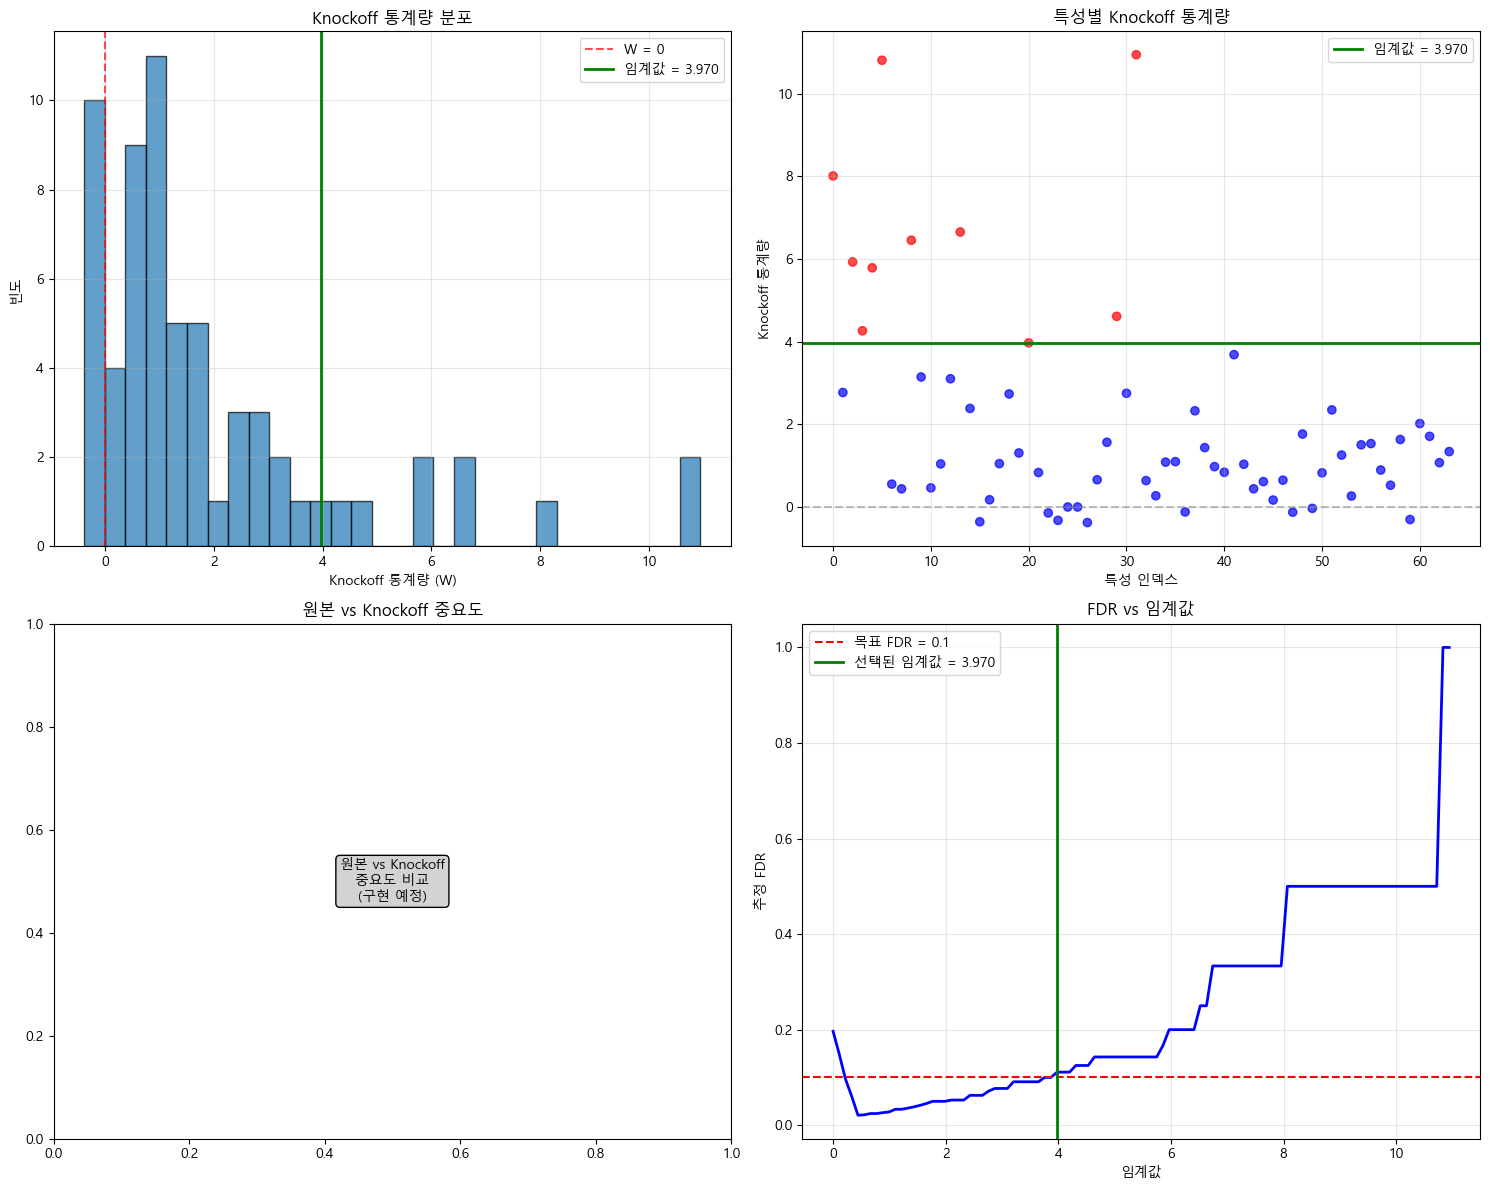


📋 Knockoff Selection 결과 요약
✅ 원본 데이터: (2356, 64)
✅ Knockoff 생성: (2356, 64)
✅ Knockoff 통계량: 64개
   양수: 54개
   음수: 8개
✅ 선택된 특성: 10개
   선택 비율: 15.6%
   FDR 수준: 0.1

🎯 선택된 특성 목록:
   • Site
   • WBC
   • RBC
   • Hb
   • Hct
   • MCHC
   • PDW
   • Monocyte
   • ANC
   • SEX
🎯 Knockoff Selection 객체 생성됨
   타겟 변수: 암종
   FDR 수준: 0.1
   랜덤 시드: 42

📚 1단계: Knockoff Selection 이해하기
🔍 Knockoff Selection이란?
   변수 선택에서 False Discovery Rate(FDR)를 통계적으로 제어하는 방법

🎯 핵심 아이디어:
   1. 원본 특성 X에 대해 '가짜' 특성 X̃ (knockoff)를 생성
   2. X̃는 X와 같은 분포를 가지지만 Y와는 독립적
   3. 원본과 knockoff를 함께 모델에 넣어 중요도 비교
   4. 원본이 knockoff보다 훨씬 중요한 특성만 선택

📊 False Discovery Rate (FDR):
   FDR = E[선택된 특성 중 거짓 양성의 비율]
   목표: FDR ≤ 0.1 보장

✅ 장점:
   - 통계적으로 엄격한 특성 선택
   - FDR 제어로 신뢰성 있는 결과
   - 고차원 데이터에서 효과적
   - 모델에 독립적 (어떤 ML 모델과도 사용 가능)

⚠️  주의사항:
   - 특성 간 상관관계가 있으면 knockoff 생성이 어려움
   - 보수적인 방법 (적은 수의 특성 선택)
   - 충분한 샘플 크기 필요

🔄 2단계: Knockoff 변수 생성
📊 원본 데이터: (2356, 64)
📊 특성 개수: 64
📊 Knockoff 생성 방법: equicorrelated
   🔧 Equicorrelated knock

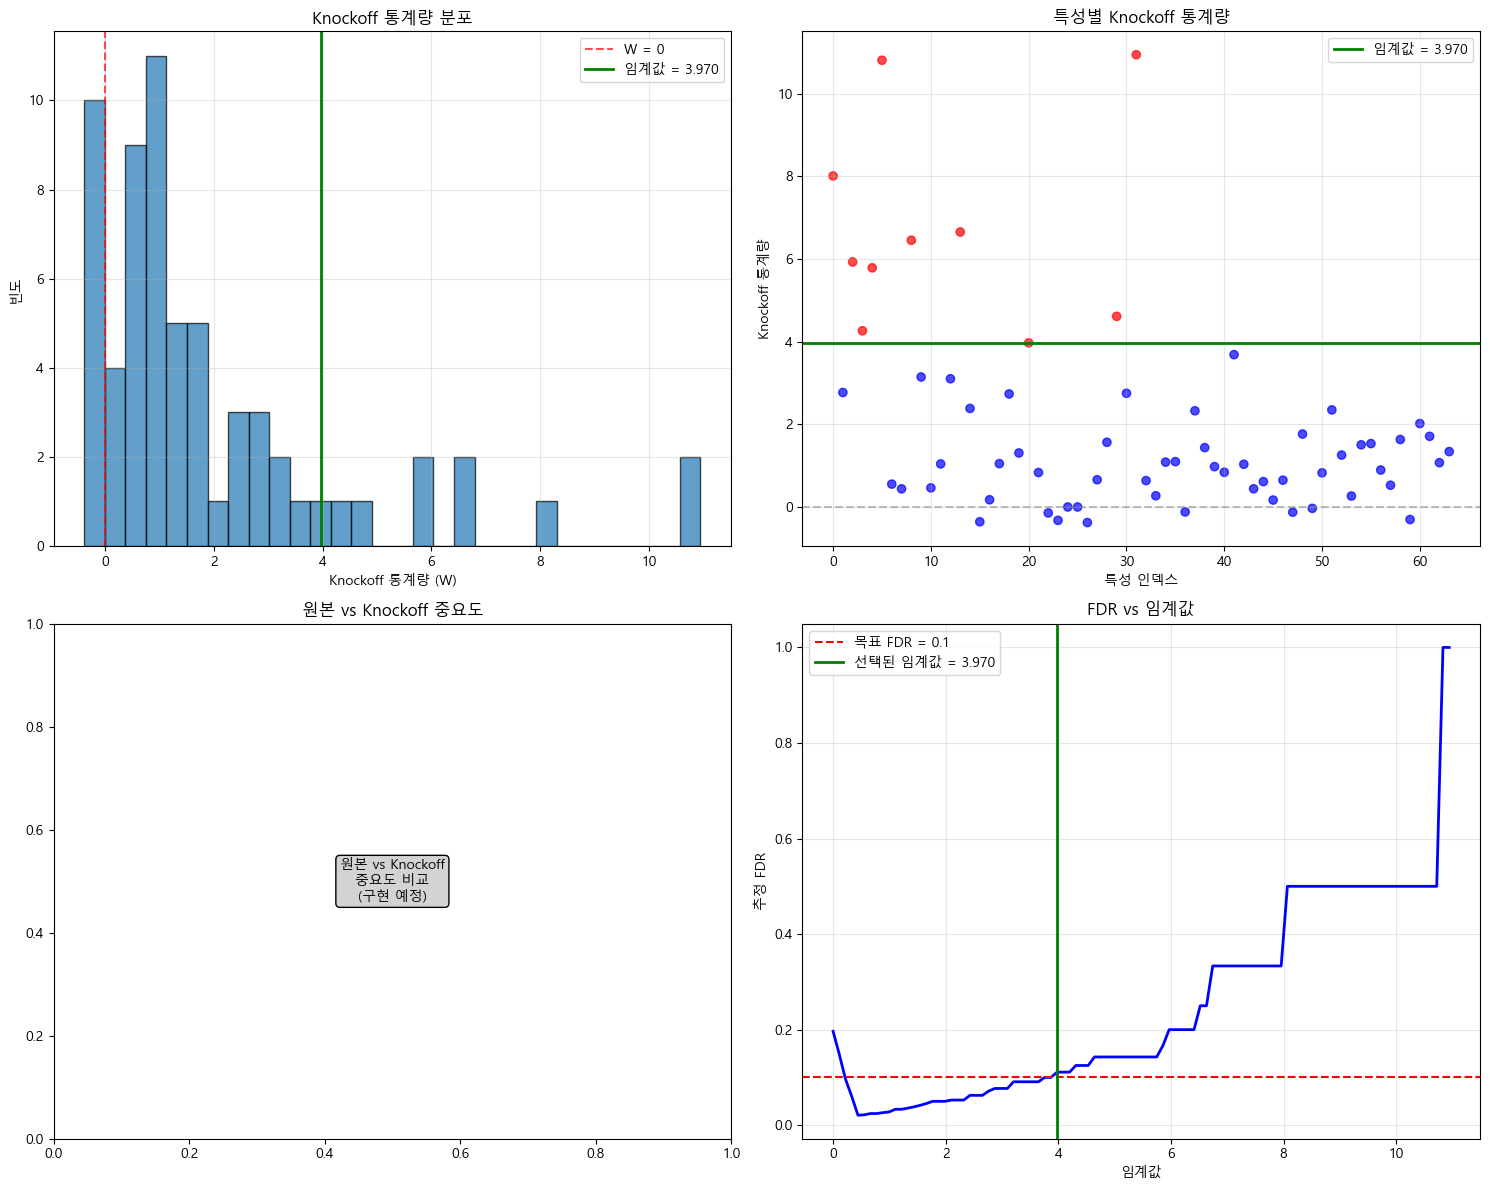

🏥 암종 데이터 Knockoff Selection 데모
📊 데이터 크기: (2356, 64)
📊 타겟 분포:
암종
0    1148
7     317
1     278
6     243
4     234
3      72
5      41
2      23
Name: count, dtype: int64

🎯 기본 분석 (FDR = 0.1)
🚀 Knockoff Selection 분석 시작
🎯 Knockoff Selection 객체 생성됨
   타겟 변수: 암종
   FDR 수준: 0.1
   랜덤 시드: 42

📚 1단계: Knockoff Selection 이해하기
🔍 Knockoff Selection이란?
   변수 선택에서 False Discovery Rate(FDR)를 통계적으로 제어하는 방법

🎯 핵심 아이디어:
   1. 원본 특성 X에 대해 '가짜' 특성 X̃ (knockoff)를 생성
   2. X̃는 X와 같은 분포를 가지지만 Y와는 독립적
   3. 원본과 knockoff를 함께 모델에 넣어 중요도 비교
   4. 원본이 knockoff보다 훨씬 중요한 특성만 선택

📊 False Discovery Rate (FDR):
   FDR = E[선택된 특성 중 거짓 양성의 비율]
   목표: FDR ≤ 0.1 보장

✅ 장점:
   - 통계적으로 엄격한 특성 선택
   - FDR 제어로 신뢰성 있는 결과
   - 고차원 데이터에서 효과적
   - 모델에 독립적 (어떤 ML 모델과도 사용 가능)

⚠️  주의사항:
   - 특성 간 상관관계가 있으면 knockoff 생성이 어려움
   - 보수적인 방법 (적은 수의 특성 선택)
   - 충분한 샘플 크기 필요

🔄 2단계: Knockoff 변수 생성
📊 원본 데이터: (2356, 64)
📊 특성 개수: 64
📊 Knockoff 생성 방법: equicorrelated
   🔧 Equicorrelated knockoffs 생성 중...
      Equicorrelated 파라미터 s: 0.0000
    

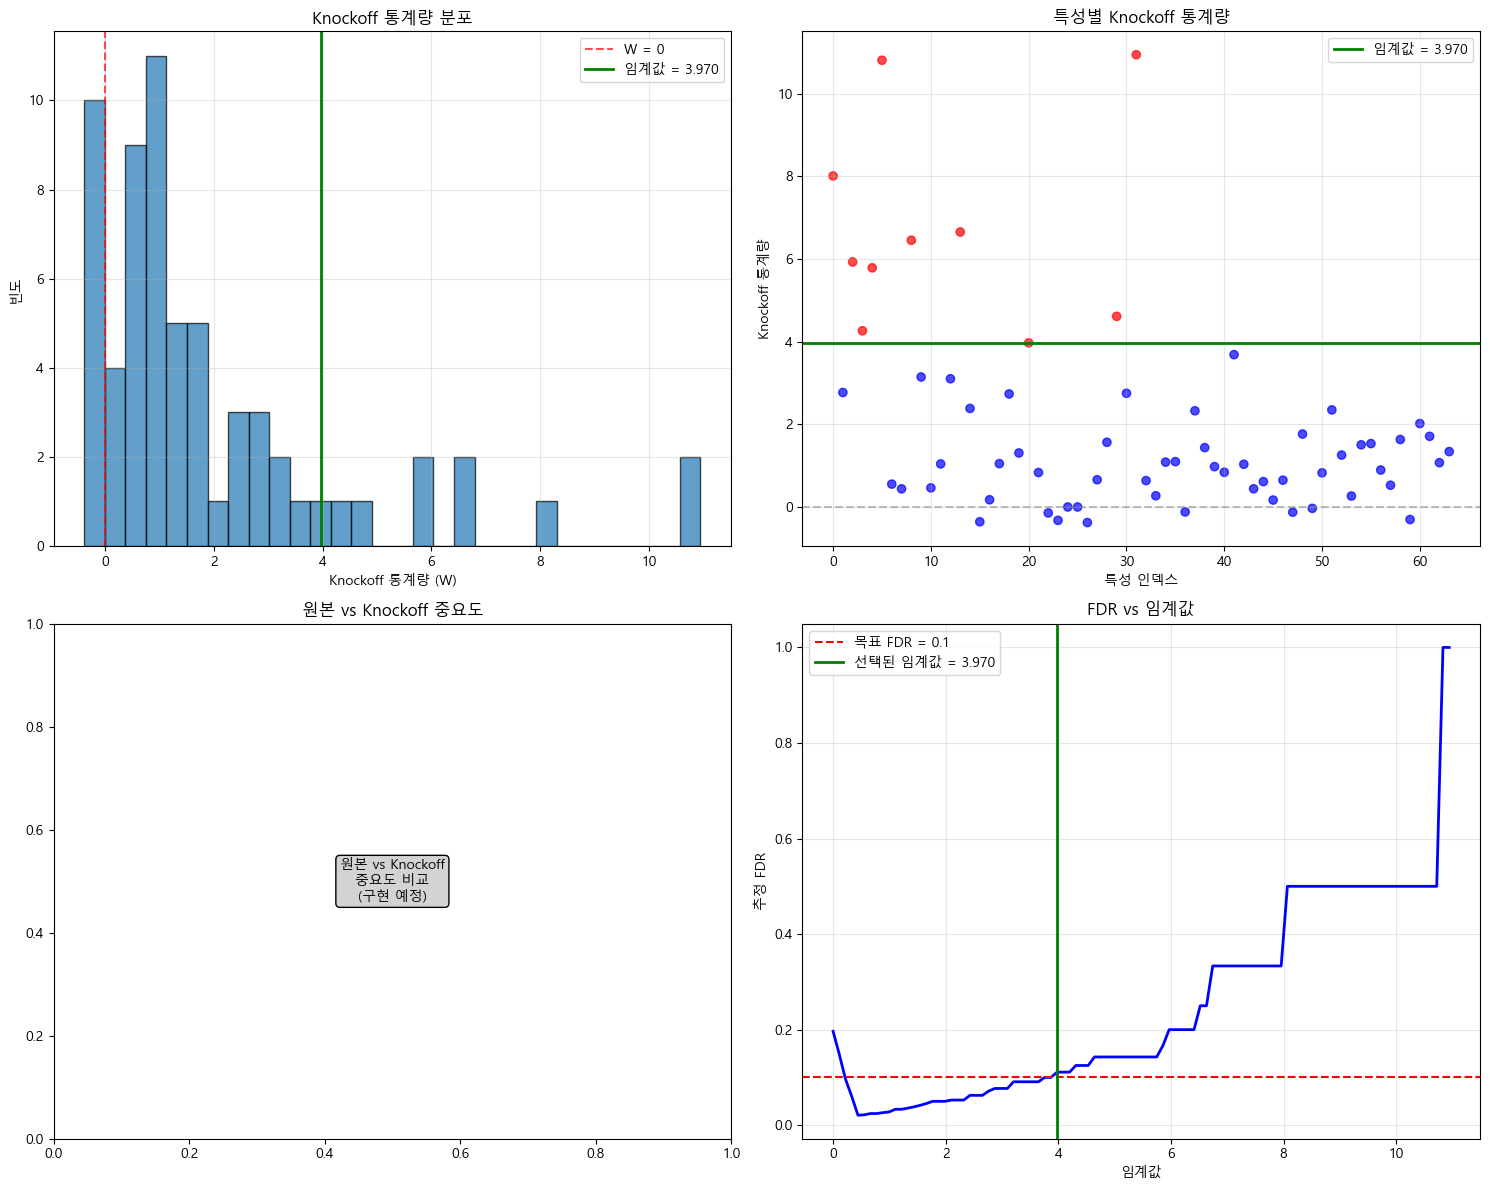


📋 Knockoff Selection 결과 요약
✅ 원본 데이터: (2356, 64)
✅ Knockoff 생성: (2356, 64)
✅ Knockoff 통계량: 64개
   양수: 54개
   음수: 8개
✅ 선택된 특성: 10개
   선택 비율: 15.6%
   FDR 수준: 0.1

🎯 선택된 특성 목록:
   • Site
   • WBC
   • RBC
   • Hb
   • Hct
   • MCHC
   • PDW
   • Monocyte
   • ANC
   • SEX

🎯 엄격한 분석 (FDR = 0.05)
🎯 Knockoff Selection 객체 생성됨
   타겟 변수: 암종
   FDR 수준: 0.05
   랜덤 시드: 42

🔄 2단계: Knockoff 변수 생성
📊 원본 데이터: (2356, 64)
📊 특성 개수: 64
📊 Knockoff 생성 방법: equicorrelated
   🔧 Equicorrelated knockoffs 생성 중...
      Equicorrelated 파라미터 s: 0.0000
      ⚠️ 행렬 연산 오류 - Permutation 방법으로 대체
   🔧 Permutation knockoffs 생성 중...
✅ Knockoff 생성 완료: (2356, 64)

   📊 Knockoff 품질 검증:
      원본-Knockoff 평균 상관관계: nan
      원본-Knockoff 최대 상관관계: nan
      ❌ 낮은 품질의 knockoffs - 결과 해석 주의

📊 3단계: Knockoff 통계량 계산
📊 결합된 데이터: (2356, 128)
📊 모델 타입: logistic
   🔧 로지스틱 회귀 중요도 계산 중...
      선택된 특성: 124개
✅ Knockoff 통계량 계산 완료
   양수 통계량: 54개
   음수 통계량: 8개
   0 통계량: 2개

🎯 4단계: 특성 선택 (FDR 제어)
📊 선택 방법: Knockoff+
📊 목표 FDR: 0.05
📊 계산된 임계값: 2.0178
📊 

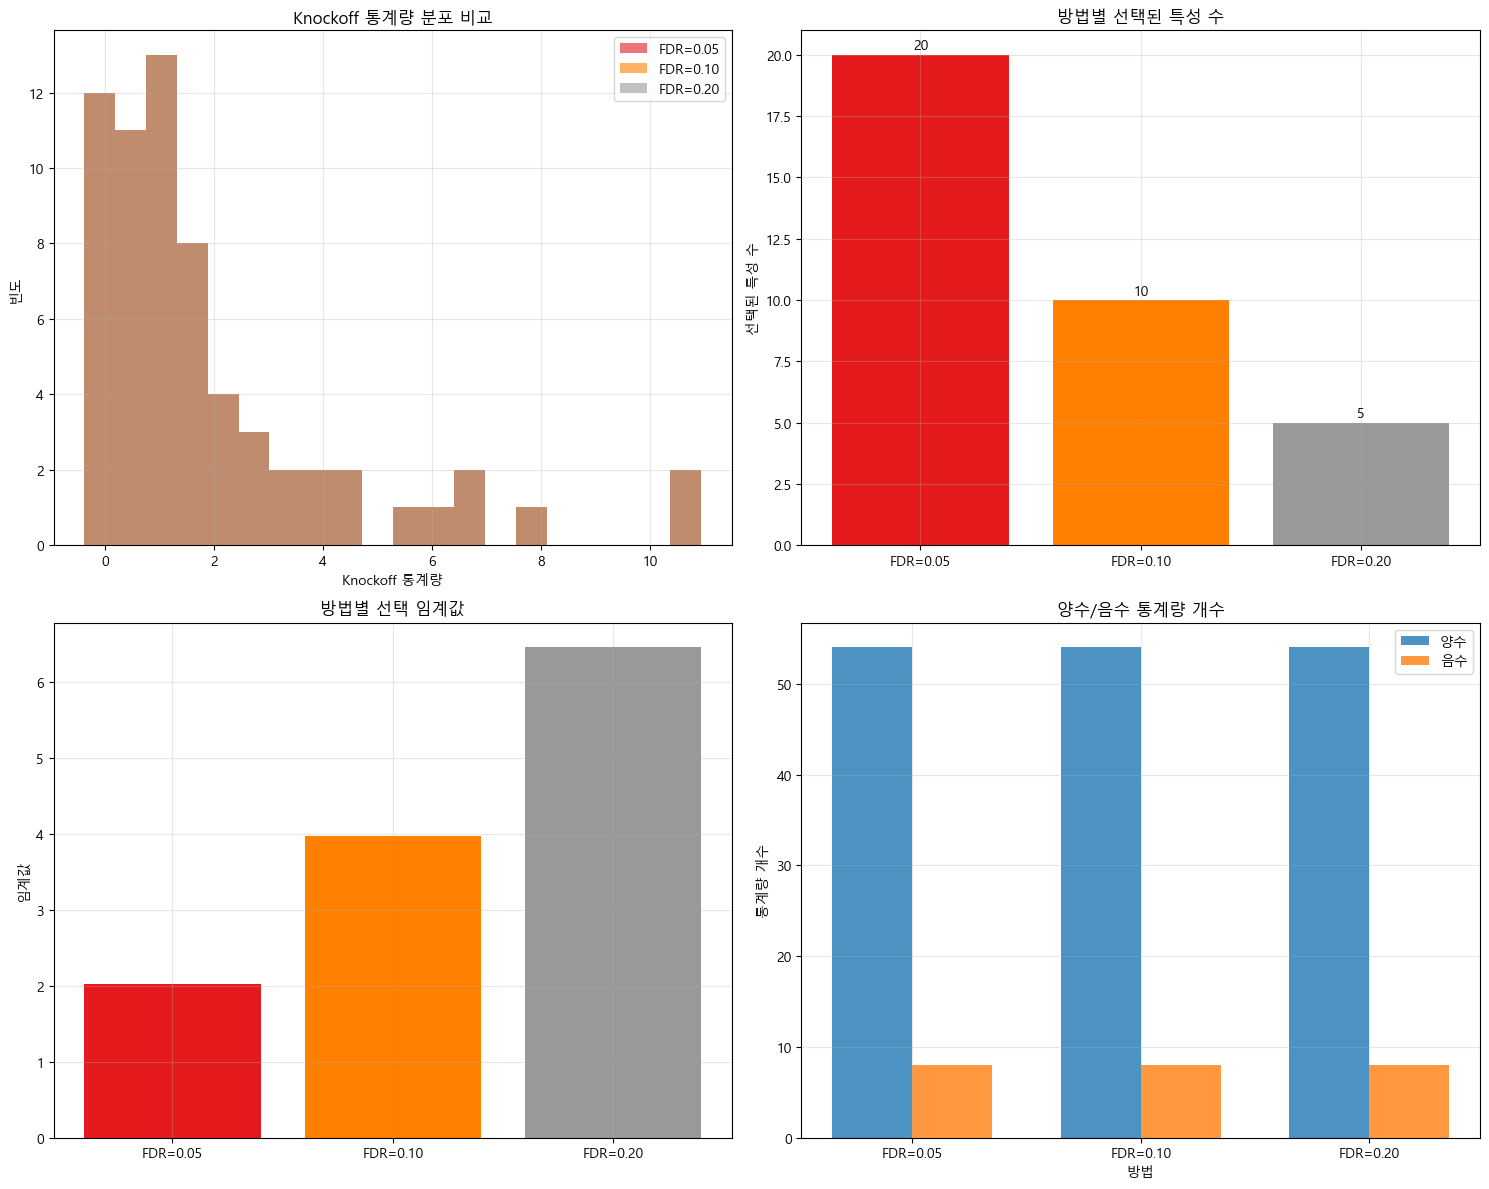

🔍 Knockoff 방법들 비교 분석

📊 FDR=0.05, Method=equicorrelated
🎯 Knockoff Selection 객체 생성됨
   타겟 변수: 암종
   FDR 수준: 0.05
   랜덤 시드: 42

🔄 2단계: Knockoff 변수 생성
📊 원본 데이터: (2356, 64)
📊 특성 개수: 64
📊 Knockoff 생성 방법: equicorrelated
   🔧 Equicorrelated knockoffs 생성 중...
      Equicorrelated 파라미터 s: 0.0000
      ⚠️ 행렬 연산 오류 - Permutation 방법으로 대체
   🔧 Permutation knockoffs 생성 중...
✅ Knockoff 생성 완료: (2356, 64)

   📊 Knockoff 품질 검증:
      원본-Knockoff 평균 상관관계: nan
      원본-Knockoff 최대 상관관계: nan
      ❌ 낮은 품질의 knockoffs - 결과 해석 주의

📊 3단계: Knockoff 통계량 계산
📊 결합된 데이터: (2356, 128)
📊 모델 타입: logistic
   🔧 로지스틱 회귀 중요도 계산 중...
      선택된 특성: 124개
✅ Knockoff 통계량 계산 완료
   양수 통계량: 54개
   음수 통계량: 8개
   0 통계량: 2개

🎯 4단계: 특성 선택 (FDR 제어)
📊 선택 방법: Knockoff+
📊 목표 FDR: 0.05
📊 계산된 임계값: 2.0178
📊 선택된 특성 수: 20
📊 전체 특성 수: 64
📊 선택 비율: 31.2%

✅ 선택된 특성들:
    1. Site                           (W =  8.0081)
    2. Stage                          (W =  2.7694)
    3. WBC                            (W =  5.9273)
    4. RBC                  

In [27]:
# 1. 기본 사용법
from KnockoffSelection import run_knockoff_analysis, KnockoffSelection, demo_knockoff_with_cancer_data, KnockoffUtils
X,y = processed_encoded.drop("암종",axis=1), processed_encoded['암종']
ko = run_knockoff_analysis(X,y, fdr_level=0.1)

# 2. 단계별 사용법
ko = KnockoffSelection(fdr_level=0.1)
ko.step1_explain_knockoffs()
ko.step2_create_knockoffs(X, method='equicorrelated')
ko.step3_compute_knockoff_statistics(y, model_type='logistic')
ko.step4_select_features(knockoff_plus=True)
ko.step5_visualize_results()

# 3. 암종 데이터 특화 데모
ko_basic, ko_strict, ko_relaxed = demo_knockoff_with_cancer_data(X, y)

# 4. 방법들 비교
comparison_df = KnockoffUtils.compare_methods(
    X, y, 
    fdr_levels=[0.05, 0.1, 0.2],
    knockoff_methods=['equicorrelated', 'gaussian', 'permutation']
)

<Axes: title={'center': '암종 분포'}, xlabel='암종'>

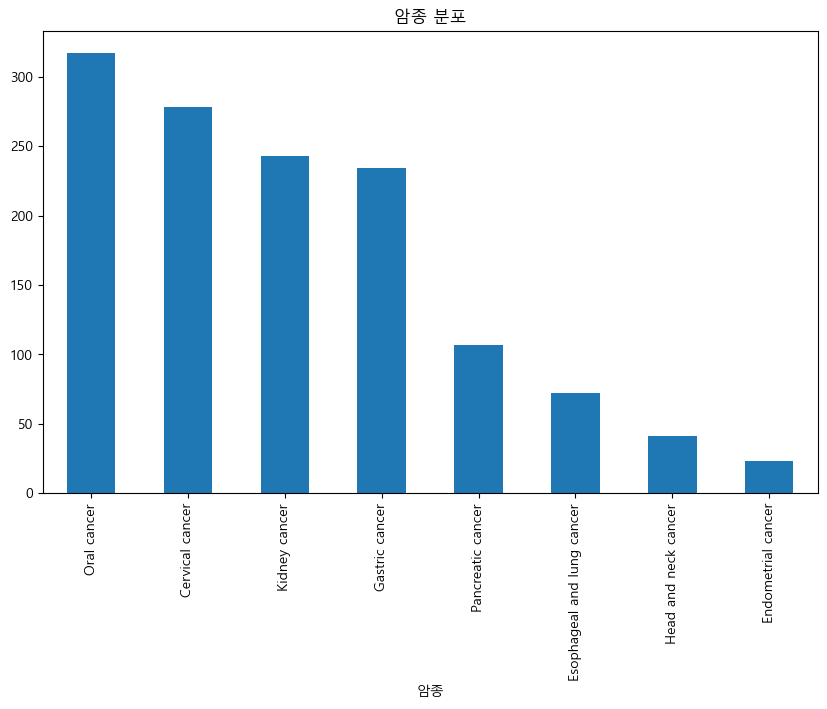

In [ ]:
whole_df['암종'].value_counts().plot(kind='bar', title='암종 분포', figsize=(10, 6))

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_fscore_support, roc_curve, auc, roc_auc_score,
    precision_score, recall_score, f1_score, cohen_kappa_score,
    matthews_corrcoef, balanced_accuracy_score
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.multiclass import unique_labels
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

class NaiveBayesMultiClassifier:
    """
    L1/Knockoff Selection 결과를 활용한 다중 클래스 Naive Bayes 분류기
    8개 암종 분류를 위한 종합 평가 시스템
    """
    
    def __init__(self, target_col='암종', random_state=42):
        self.target_col = target_col
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        
        # 모델들
        self.models = {
            'GaussianNB': GaussianNB(),
            'MultinomialNB': MultinomialNB(),
            'BernoulliNB': BernoulliNB()
        }
        
        self.best_model = None
        self.best_model_name = None
        
        # 결과 저장
        self.feature_sets = {}
        self.results = {}
        self.evaluation_metrics = {}
        
        print("🎯 Naive Bayes 다중 분류기 생성됨")
        print(f"   타겟 변수: {self.target_col}")
        print(f"   사용 가능한 모델: {list(self.models.keys())}")
        print(f"   랜덤 시드: {self.random_state}")
    
    def step1_prepare_feature_sets(self, df, l1_features=None, knockoff_features=None, 
                                  all_features=None):
        """
        1단계: L1과 Knockoff에서 선택된 특성 집합을 준비합니다.
        
        Parameters:
        -----------
        df : pandas.DataFrame
            전체 데이터
        l1_features : list
            L1 정규화로 선택된 특성들
        knockoff_features : list
            Knockoff Selection으로 선택된 특성들
        all_features : list
            전체 특성 (비교용)
        """
        print("\n🔧 1단계: 특성 집합 준비")
        print("=" * 40)
        
        self.raw_data = df.copy()
        
        # 특성 집합 정의
        self.feature_sets = {}
        
        if l1_features:
            # 실제 데이터에 존재하는 특성만 필터링
            available_l1 = [f for f in l1_features if f in df.columns]
            self.feature_sets['L1_selected'] = available_l1
            print(f"📊 L1 선택 특성: {len(available_l1)}개 (원래 {len(l1_features)}개)")
        
        if knockoff_features:
            available_ko = [f for f in knockoff_features if f in df.columns]
            self.feature_sets['Knockoff_selected'] = available_ko
            print(f"📊 Knockoff 선택 특성: {len(available_ko)}개 (원래 {len(knockoff_features)}개)")
        
        if l1_features and knockoff_features:
            # 교집합 (두 방법 모두에서 선택된 특성)
            intersection = list(set(available_l1) & set(available_ko))
            self.feature_sets['Intersection'] = intersection
            print(f"📊 교집합 특성: {len(intersection)}개")
            
            # 합집합 (둘 중 하나라도 선택된 특성)
            union = list(set(available_l1) | set(available_ko))
            self.feature_sets['Union'] = union
            print(f"📊 합집합 특성: {len(union)}개")
        
        if all_features:
            available_all = [f for f in all_features if f in df.columns and f != self.target_col]
            self.feature_sets['All_features'] = available_all
            print(f"📊 전체 특성: {len(available_all)}개")
        
        # 타겟 변수 확인
        if self.target_col in df.columns:
            target_counts = df[self.target_col].value_counts()
            print(f"\n🎯 타겟 변수 분포 ({len(target_counts)}개 클래스):")
            for cancer_type, count in target_counts.items():
                percentage = (count / len(df)) * 100
                print(f"   {cancer_type}: {count}개 ({percentage:.1f}%)")
        
        return self.feature_sets
    
    def step2_evaluate_feature_sets(self, test_size=0.2, cv_folds=5):
        """
        2단계: 각 특성 집합에 대해 모든 Naive Bayes 모델을 평가합니다.
        
        Parameters:
        -----------
        test_size : float
            테스트 세트 비율
        cv_folds : int
            교차검증 fold 수
        """
        print("\n📊 2단계: 특성 집합별 모델 평가")
        print("=" * 50)
        
        if not self.feature_sets:
            print("❌ step1_prepare_feature_sets()를 먼저 실행하세요!")
            return None
        
        df = self.raw_data
        y = df[self.target_col].dropna()
        
        # 타겟 인코딩
        y_encoded = self.label_encoder.fit_transform(y)
        
        self.results = {}
        
        for set_name, features in self.feature_sets.items():
            print(f"\n🔍 {set_name} 평가 중... ({len(features)}개 특성)")
            
            if len(features) == 0:
                print("   ⚠️ 특성이 없어 건너뜁니다.")
                continue
            
            # 특성 데이터 준비
            X = df[features].loc[y.index]
            
            # 결측값 처리
            if X.isnull().any().any():
                X = X.fillna(0)
            
            # 데이터 분할
            X_train, X_test, y_train, y_test = train_test_split(
                X, y_encoded, test_size=test_size, 
                random_state=self.random_state, stratify=y_encoded
            )
            
            set_results = {}
            
            for model_name, model in self.models.items():
                try:
                    # 모델별 데이터 전처리
                    X_train_processed, X_test_processed = self._preprocess_for_model(
                        X_train, X_test, model_name
                    )
                    
                    # 모델 학습
                    model_copy = self._get_model_copy(model_name)
                    model_copy.fit(X_train_processed, y_train)
                    
                    # 예측
                    y_pred = model_copy.predict(X_test_processed)
                    y_pred_proba = model_copy.predict_proba(X_test_processed)
                    
                    # 교차검증
                    cv_scores = cross_val_score(
                        self._get_model_copy(model_name), 
                        X_train_processed, y_train,
                        cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, 
                                         random_state=self.random_state),
                        scoring='accuracy'
                    )
                    
                    # 결과 저장
                    set_results[model_name] = {
                        'model': model_copy,
                        'y_test': y_test,
                        'y_pred': y_pred,
                        'y_pred_proba': y_pred_proba,
                        'cv_scores': cv_scores,
                        'features': features,
                        'X_test': X_test_processed
                    }
                    
                    print(f"   {model_name}: CV Accuracy = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
                    
                except Exception as e:
                    print(f"   ❌ {model_name} 오류: {str(e)[:50]}...")
                    continue
            
            self.results[set_name] = set_results
        
        print(f"\n✅ 평가 완료: {len(self.results)}개 특성 집합, 총 {sum(len(r) for r in self.results.values())}개 모델")
        
        return self.results
    
    def step3_comprehensive_evaluation(self):
        """
        3단계: 종합적인 평가 지표를 계산합니다.
        """
        print("\n📈 3단계: 종합 평가 지표 계산")
        print("=" * 40)
        
        if not self.results:
            print("❌ step2_evaluate_feature_sets()를 먼저 실행하세요!")
            return None
        
        self.evaluation_metrics = {}
        
        for set_name, set_results in self.results.items():
            print(f"\n🔍 {set_name} 평가 지표:")
            print("-" * 30)
            
            set_metrics = {}
            
            for model_name, result in set_results.items():
                y_test = result['y_test']
                y_pred = result['y_pred']
                y_pred_proba = result['y_pred_proba']
                cv_scores = result['cv_scores']
                
                # 기본 메트릭
                metrics = self._calculate_comprehensive_metrics(y_test, y_pred, y_pred_proba)
                metrics['cv_accuracy_mean'] = cv_scores.mean()
                metrics['cv_accuracy_std'] = cv_scores.std()
                metrics['n_features'] = len(result['features'])
                
                set_metrics[model_name] = metrics
                
                print(f"  {model_name:12} | Acc: {metrics['accuracy']:.4f} | "
                      f"F1: {metrics['f1_weighted']:.4f} | AUC: {metrics['auc_weighted']:.4f}")
            
            self.evaluation_metrics[set_name] = set_metrics
        
        # 최고 성능 모델 찾기
        self._find_best_model()
        
        return self.evaluation_metrics
    
    def step4_visualize_results(self, figsize=(20, 15)):
        """
        4단계: 결과를 종합적으로 시각화합니다.
        
        Parameters:
        -----------
        figsize : tuple
            그래프 크기
        """
        print("\n🎨 4단계: 결과 시각화")
        print("=" * 30)
        
        if not self.evaluation_metrics:
            print("❌ step3_comprehensive_evaluation()을 먼저 실행하세요!")
            return
        
        # 서브플롯 설정
        fig = plt.figure(figsize=figsize)
        
        # 1. 성능 비교 히트맵
        self._plot_performance_heatmap(plt.subplot(3, 3, 1))
        
        # 2. 특성 집합별 성능 비교
        self._plot_feature_set_comparison(plt.subplot(3, 3, 2))
        
        # 3. 모델별 성능 비교
        self._plot_model_comparison(plt.subplot(3, 3, 3))
        
        # 4. 최고 성능 모델의 혼동행렬
        if self.best_model:
            self._plot_best_confusion_matrix(plt.subplot(3, 3, 4))
        
        # 5. ROC 곡선 (One-vs-Rest)
        self._plot_multiclass_roc(plt.subplot(3, 3, 5))
        
        # 6. 클래스별 성능
        self._plot_class_performance(plt.subplot(3, 3, 6))
        
        # 7. 특성 수 vs 성능
        self._plot_features_vs_performance(plt.subplot(3, 3, 7))
        
        # 8. 교차검증 결과
        self._plot_cv_results(plt.subplot(3, 3, 8))
        
        # 9. 모델 복잡도 비교
        self._plot_model_complexity(plt.subplot(3, 3, 9))
        
        plt.tight_layout()
        plt.show()
    
    def step5_generate_report(self):
        """
        5단계: 상세한 분석 리포트를 생성합니다.
        """
        print("\n📋 5단계: 분석 리포트 생성")
        print("=" * 40)
        
        if not self.evaluation_metrics:
            print("❌ step3_comprehensive_evaluation()을 먼저 실행하세요!")
            return
        
        # 요약 통계
        self._print_summary_statistics()
        
        # 최고 성능 모델 상세 분석
        if self.best_model:
            self._print_best_model_analysis()
        
        # 특성 집합 비교
        self._print_feature_set_analysis()
        
        # 클래스별 성능 분석
        self._print_class_analysis()
        
        # 권장사항
        self._print_recommendations()
    
    def _preprocess_for_model(self, X_train, X_test, model_name):
        """모델별 전처리를 수행합니다."""
        
        if model_name == 'GaussianNB':
            # Gaussian NB는 연속형 데이터 가정 - 표준화
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)
            return X_train_scaled, X_test_scaled
        
        elif model_name == 'MultinomialNB':
            # Multinomial NB는 비음수 값 필요
            X_train_pos = np.abs(X_train)  # 절댓값 취하기
            X_test_pos = np.abs(X_test)
            return X_train_pos, X_test_pos
        
        elif model_name == 'BernoulliNB':
            # Bernoulli NB는 이진 데이터 - 임계값 적용
            threshold = 0.5
            X_train_bin = (X_train > threshold).astype(int)
            X_test_bin = (X_test > threshold).astype(int)
            return X_train_bin, X_test_bin
        
        else:
            return X_train, X_test
    
    def _get_model_copy(self, model_name):
        """모델의 새로운 인스턴스를 반환합니다."""
        if model_name == 'GaussianNB':
            return GaussianNB()
        elif model_name == 'MultinomialNB':
            return MultinomialNB()
        elif model_name == 'BernoulliNB':
            return BernoulliNB()
        else:
            return self.models[model_name]
    
    def _calculate_comprehensive_metrics(self, y_true, y_pred, y_pred_proba):
        """종합적인 평가 지표를 계산합니다."""
        
        n_classes = len(np.unique(y_true))
        
        metrics = {
            # 기본 정확도
            'accuracy': accuracy_score(y_true, y_pred),
            'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
            
            # 정밀도, 재현율, F1 점수
            'precision_macro': precision_score(y_true, y_pred, average='macro', zero_division=0),
            'precision_weighted': precision_score(y_true, y_pred, average='weighted', zero_division=0),
            'recall_macro': recall_score(y_true, y_pred, average='macro', zero_division=0),
            'recall_weighted': recall_score(y_true, y_pred, average='weighted', zero_division=0),
            'f1_macro': f1_score(y_true, y_pred, average='macro', zero_division=0),
            'f1_weighted': f1_score(y_true, y_pred, average='weighted', zero_division=0),
            
            # 다중 클래스 특화 지표
            'cohen_kappa': cohen_kappa_score(y_true, y_pred),
            'matthews_corrcoef': matthews_corrcoef(y_true, y_pred) if n_classes == 2 else None,
        }
        
        # ROC AUC (다중 클래스)
        try:
            if n_classes > 2:
                metrics['auc_ovr'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro')
                metrics['auc_weighted'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='weighted')
            else:
                metrics['auc_ovr'] = roc_auc_score(y_true, y_pred_proba[:, 1])
                metrics['auc_weighted'] = metrics['auc_ovr']
        except:
            metrics['auc_ovr'] = None
            metrics['auc_weighted'] = None
        
        return metrics
    
    def _find_best_model(self):
        """최고 성능 모델을 찾습니다."""
        
        best_score = -1
        best_key = None
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            for model_name, metrics in set_metrics.items():
                # 종합 점수 계산 (정확도 + F1 + AUC의 평균)
                score_components = [
                    metrics['accuracy'],
                    metrics['f1_weighted'],
                    metrics.get('auc_weighted', 0) or 0
                ]
                composite_score = np.mean(score_components)
                
                if composite_score > best_score:
                    best_score = composite_score
                    best_key = (set_name, model_name)
        
        if best_key:
            self.best_model = self.results[best_key[0]][best_key[1]]
            self.best_model_name = f"{best_key[0]}_{best_key[1]}"
            
            print(f"\n🏆 최고 성능 모델: {self.best_model_name}")
            print(f"   종합 점수: {best_score:.4f}")
    
    def _plot_performance_heatmap(self, ax):
        """성능 히트맵을 그립니다."""
        
        # 성능 데이터 준비
        data = []
        index_names = []
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            for model_name, metrics in set_metrics.items():
                data.append([
                    metrics['accuracy'],
                    metrics['f1_weighted'], 
                    metrics.get('auc_weighted', 0) or 0
                ])
                index_names.append(f"{set_name}_{model_name}")
        
        if data:
            df_heatmap = pd.DataFrame(data, 
                                    index=index_names,
                                    columns=['Accuracy', 'F1_Weighted', 'AUC_Weighted'])
            
            sns.heatmap(df_heatmap, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax)
            ax.set_title('모델 성능 히트맵')
            ax.set_xlabel('')
            plt.setp(ax.get_xticklabels(), rotation=45)
            plt.setp(ax.get_yticklabels(), rotation=0)
    
    def _plot_feature_set_comparison(self, ax):
        """특성 집합별 성능 비교를 그립니다."""
        
        set_names = []
        accuracies = []
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            # 각 특성 집합에서 최고 성능 모델의 정확도
            best_acc = max(metrics['accuracy'] for metrics in set_metrics.values())
            set_names.append(set_name)
            accuracies.append(best_acc)
        
        if set_names:
            bars = ax.bar(set_names, accuracies, color='skyblue', alpha=0.7)
            ax.set_title('특성 집합별 최고 성능')
            ax.set_ylabel('정확도')
            ax.set_ylim(0, 1)
            
            # 막대 위에 값 표시
            for bar, acc in zip(bars, accuracies):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{acc:.3f}', ha='center', va='bottom')
            
            plt.setp(ax.get_xticklabels(), rotation=45)
    
    def _plot_model_comparison(self, ax):
        """모델별 성능 비교를 그립니다."""
        
        model_performance = {}
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            for model_name, metrics in set_metrics.items():
                if model_name not in model_performance:
                    model_performance[model_name] = []
                model_performance[model_name].append(metrics['accuracy'])
        
        if model_performance:
            model_names = list(model_performance.keys())
            mean_accs = [np.mean(model_performance[name]) for name in model_names]
            std_accs = [np.std(model_performance[name]) for name in model_names]
            
            ax.bar(model_names, mean_accs, yerr=std_accs, capsize=5, 
                  color='lightgreen', alpha=0.7)
            ax.set_title('모델별 평균 성능')
            ax.set_ylabel('정확도')
            ax.set_ylim(0, 1)
    
    def _plot_best_confusion_matrix(self, ax):
        """최고 성능 모델의 혼동행렬을 그립니다."""
        
        if not self.best_model:
            ax.text(0.5, 0.5, '최고 성능 모델 없음', ha='center', va='center', transform=ax.transAxes)
            return
        
        y_test = self.best_model['y_test']
        y_pred = self.best_model['y_pred']
        
        cm = confusion_matrix(y_test, y_pred)
        class_names = self.label_encoder.classes_
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_title(f'혼동행렬 ({self.best_model_name})')
        ax.set_xlabel('예측값')
        ax.set_ylabel('실제값')
    
    def _plot_multiclass_roc(self, ax):
        """다중 클래스 ROC 곡선을 그립니다."""
        
        if not self.best_model:
            ax.text(0.5, 0.5, '최고 성능 모델 없음', ha='center', va='center', transform=ax.transAxes)
            return
        
        y_test = self.best_model['y_test']
        y_pred_proba = self.best_model['y_pred_proba']
        
        # One-vs-Rest ROC
        n_classes = len(self.label_encoder.classes_)
        
        for i in range(n_classes):
            y_test_binary = (y_test == i).astype(int)
            y_score = y_pred_proba[:, i]
            
            fpr, tpr, _ = roc_curve(y_test_binary, y_score)
            auc_score = auc(fpr, tpr)
            
            ax.plot(fpr, tpr, label=f'{self.label_encoder.classes_[i]} (AUC = {auc_score:.3f})')
        
        ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('다중 클래스 ROC 곡선')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    def _plot_class_performance(self, ax):
        """클래스별 성능을 그립니다."""
        
        if not self.best_model:
            ax.text(0.5, 0.5, '최고 성능 모델 없음', ha='center', va='center', transform=ax.transAxes)
            return
        
        y_test = self.best_model['y_test']
        y_pred = self.best_model['y_pred']
        
        # 클래스별 정밀도, 재현율, F1 점수
        precision, recall, f1, support = precision_recall_fscore_support(
            y_test, y_pred, average=None, zero_division=0
        )
        
        class_names = self.label_encoder.classes_
        x = np.arange(len(class_names))
        width = 0.25
        
        ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
        ax.bar(x, recall, width, label='Recall', alpha=0.8)
        ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)
        
        ax.set_xlabel('Cancer Types')
        ax.set_ylabel('Score')
        ax.set_title('클래스별 성능')
        ax.set_xticks(x)
        ax.set_xticklabels(class_names, rotation=45)
        ax.legend()
    
    def _plot_features_vs_performance(self, ax):
        """특성 수 vs 성능을 그립니다."""
        
        feature_counts = []
        accuracies = []
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            for model_name, metrics in set_metrics.items():
                feature_counts.append(metrics['n_features'])
                accuracies.append(metrics['accuracy'])
        
        if feature_counts:
            ax.scatter(feature_counts, accuracies, alpha=0.7, s=60)
            ax.set_xlabel('특성 수')
            ax.set_ylabel('정확도')
            ax.set_title('특성 수 vs 성능')
            ax.grid(True, alpha=0.3)
    
    def _plot_cv_results(self, ax):
        """교차검증 결과를 그립니다."""
        
        models = []
        cv_means = []
        cv_stds = []
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            for model_name, metrics in set_metrics.items():
                models.append(f"{set_name}_{model_name}")
                cv_means.append(metrics['cv_accuracy_mean'])
                cv_stds.append(metrics['cv_accuracy_std'])
        
        if models:
            ax.errorbar(range(len(models)), cv_means, yerr=cv_stds, 
                       fmt='o', capsize=5, capthick=2)
            ax.set_xlabel('모델')
            ax.set_ylabel('교차검증 정확도')
            ax.set_title('교차검증 결과')
            ax.set_xticks(range(len(models)))
            ax.set_xticklabels(models, rotation=45)
            ax.grid(True, alpha=0.3)
    
    def _plot_model_complexity(self, ax):
        """모델 복잡도 비교를 그립니다."""
        
        # 간단한 복잡도 점수 (특성 수 기반)
        set_names = []
        complexities = []
        accuracies = []
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            best_metrics = max(set_metrics.values(), key=lambda x: x['accuracy'])
            set_names.append(set_name)
            complexities.append(best_metrics['n_features'])
            accuracies.append(best_metrics['accuracy'])
        
        if set_names:
            # 복잡도 vs 성능 산점도
            colors = plt.cm.viridis(np.linspace(0, 1, len(set_names)))
            
            for i, (name, complexity, accuracy) in enumerate(zip(set_names, complexities, accuracies)):
                ax.scatter(complexity, accuracy, c=[colors[i]], s=100, alpha=0.7, label=name)
            
            ax.set_xlabel('모델 복잡도 (특성 수)')
            ax.set_ylabel('정확도')
            ax.set_title('모델 복잡도 vs 성능')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.grid(True, alpha=0.3)
    
    def _print_summary_statistics(self):
        """요약 통계를 출력합니다."""
        
        print("\n" + "="*60)
        print("📊 NAIVE BAYES 다중 분류 분석 요약")
        print("="*60)
        
        total_models = sum(len(set_metrics) for set_metrics in self.evaluation_metrics.values())
        print(f"📈 총 평가된 모델: {total_models}개")
        print(f"📈 특성 집합: {len(self.evaluation_metrics)}개")
        print(f"📈 타겟 클래스: {len(self.label_encoder.classes_)}개")
        
        # 전체 성능 통계
        all_accuracies = []
        all_f1_scores = []
        
        for set_metrics in self.evaluation_metrics.values():
            for metrics in set_metrics.values():
                all_accuracies.append(metrics['accuracy'])
                all_f1_scores.append(metrics['f1_weighted'])
        
        print(f"\n📊 전체 성능 통계:")
        print(f"   평균 정확도: {np.mean(all_accuracies):.4f} (±{np.std(all_accuracies):.4f})")
        print(f"   최고 정확도: {np.max(all_accuracies):.4f}")
        print(f"   최저 정확도: {np.min(all_accuracies):.4f}")
        print(f"   평균 F1-Score: {np.mean(all_f1_scores):.4f} (±{np.std(all_f1_scores):.4f})")
    
    def _print_best_model_analysis(self):
        """최고 성능 모델의 상세 분석을 출력합니다."""
        
        print(f"\n🏆 최고 성능 모델 상세 분석: {self.best_model_name}")
        print("-"*50)
        
        y_test = self.best_model['y_test']
        y_pred = self.best_model['y_pred']
        features = self.best_model['features']
        
        # 기본 성능 지표
        accuracy = accuracy_score(y_test, y_pred)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        
        print(f"📊 전체 성능:")
        print(f"   정확도: {accuracy:.4f}")
        print(f"   균형 정확도: {balanced_acc:.4f}")
        print(f"   Cohen's Kappa: {kappa:.4f}")
        print(f"   사용된 특성 수: {len(features)}")
        
        # 클래스별 성능
        print(f"\n📋 클래스별 상세 성능:")
        class_report = classification_report(
            y_test, y_pred, 
            target_names=self.label_encoder.classes_,
            output_dict=True
        )
        
        for class_name in self.label_encoder.classes_:
            if class_name in class_report:
                metrics = class_report[class_name]
                print(f"   {class_name:15} | Precision: {metrics['precision']:.3f} | "
                      f"Recall: {metrics['recall']:.3f} | F1: {metrics['f1-score']:.3f} | "
                      f"Support: {int(metrics['support'])}")
        
        # 특성 중요도 (상위 10개)
        print(f"\n🔍 사용된 주요 특성 (상위 10개):")
        for i, feature in enumerate(features[:10], 1):
            print(f"   {i:2d}. {feature}")
        
        if len(features) > 10:
            print(f"   ... 및 {len(features) - 10}개 더")
    
    def _print_feature_set_analysis(self):
        """특성 집합별 분석을 출력합니다."""
        
        print(f"\n🔬 특성 집합별 성능 분석")
        print("-"*40)
        
        for set_name, set_metrics in self.evaluation_metrics.items():
            best_model = max(set_metrics.items(), key=lambda x: x[1]['accuracy'])
            best_model_name, best_metrics = best_model
            
            print(f"\n📊 {set_name}:")
            print(f"   최고 성능 모델: {best_model_name}")
            print(f"   정확도: {best_metrics['accuracy']:.4f}")
            print(f"   F1-Score: {best_metrics['f1_weighted']:.4f}")
            print(f"   특성 수: {best_metrics['n_features']}")
            
            # 모델별 성능 요약
            model_accs = [metrics['accuracy'] for metrics in set_metrics.values()]
            print(f"   모델 성능 범위: {min(model_accs):.4f} ~ {max(model_accs):.4f}")
    
    def _print_class_analysis(self):
        """클래스별 성능 분석을 출력합니다."""
        
        if not self.best_model:
            return
        
        print(f"\n🎯 클래스별 성능 분석 (최고 성능 모델 기준)")
        print("-"*50)
        
        y_test = self.best_model['y_test']
        y_pred = self.best_model['y_pred']
        
        # 각 클래스의 분류 성공/실패 분석
        cm = confusion_matrix(y_test, y_pred)
        class_names = self.label_encoder.classes_
        
        print(f"📊 클래스별 분류 결과:")
        for i, class_name in enumerate(class_names):
            true_positives = cm[i, i]
            false_positives = cm[:, i].sum() - true_positives
            false_negatives = cm[i, :].sum() - true_positives
            true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)
            
            if cm[i, :].sum() > 0:  # 실제로 해당 클래스가 존재하는 경우
                sensitivity = true_positives / cm[i, :].sum()
                if (true_positives + false_positives) > 0:
                    precision = true_positives / (true_positives + false_positives)
                else:
                    precision = 0
                
                print(f"   {class_name:15} | 민감도: {sensitivity:.3f} | "
                      f"정밀도: {precision:.3f} | 실제: {cm[i, :].sum():3d}개")
        
        # 가장 혼동하기 쉬운 클래스 쌍
        print(f"\n❓ 가장 혼동하기 쉬운 클래스 쌍:")
        max_confusion = 0
        confused_pair = None
        
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                if i != j and cm[i, j] > max_confusion:
                    max_confusion = cm[i, j]
                    confused_pair = (class_names[i], class_names[j])
        
        if confused_pair:
            print(f"   {confused_pair[0]} → {confused_pair[1]}: {max_confusion}건")
    
    def _print_recommendations(self):
        """분석 결과 기반 권장사항을 출력합니다."""
        
        print(f"\n💡 분석 결과 및 권장사항")
        print("="*50)
        
        # 최고 성능 모델 추천
        if self.best_model:
            set_name, model_name = self.best_model_name.rsplit('_', 1)
            print(f"🏆 권장 모델: {model_name} with {set_name}")
            
            best_acc = max(
                metrics['accuracy'] 
                for set_metrics in self.evaluation_metrics.values()
                for metrics in set_metrics.values()
            )
            
            if best_acc > 0.9:
                print("   ✅ 우수한 성능 (90% 이상)")
            elif best_acc > 0.8:
                print("   ⚠️ 양호한 성능 (80-90%)")
            else:
                print("   ❌ 개선 필요 (80% 미만)")
        
        # 특성 선택 방법 비교
        if 'L1_selected' in self.evaluation_metrics and 'Knockoff_selected' in self.evaluation_metrics:
            l1_best = max(self.evaluation_metrics['L1_selected'].values(), key=lambda x: x['accuracy'])
            ko_best = max(self.evaluation_metrics['Knockoff_selected'].values(), key=lambda x: x['accuracy'])
            
            print(f"\n🔍 특성 선택 방법 비교:")
            print(f"   L1 정규화: {l1_best['accuracy']:.4f} ({l1_best['n_features']}개 특성)")
            print(f"   Knockoff: {ko_best['accuracy']:.4f} ({ko_best['n_features']}개 특성)")
            
            if l1_best['accuracy'] > ko_best['accuracy']:
                print("   → L1 정규화가 더 효과적")
            elif ko_best['accuracy'] > l1_best['accuracy']:
                print("   → Knockoff Selection이 더 효과적")
            else:
                print("   → 두 방법의 성능이 유사")
        
        # 모델별 특성
        print(f"\n🤖 Naive Bayes 모델별 특성:")
        print("   GaussianNB: 연속형 데이터에 적합, 특성 간 독립성 가정")
        print("   MultinomialNB: 카운트 데이터에 적합, 텍스트 분류에 유용")
        print("   BernoulliNB: 이진 데이터에 적합, sparse 데이터에 효과적")
        
        # 개선 방향
        print(f"\n🚀 모델 개선 방향:")
        print("   1. 특성 엔지니어링으로 새로운 특성 생성")
        print("   2. 앙상블 방법으로 여러 모델 결합")
        print("   3. 하이퍼파라미터 튜닝 (평활화 파라미터 등)")
        print("   4. 클래스 불균형 해결 (SMOTE, 가중치 조정 등)")
        print("   5. 특성 스케일링 및 변환 방법 개선")
    
    def get_feature_importance_analysis(self):
        """특성 중요도 분석 결과를 반환합니다."""
        
        if not self.best_model:
            return None
        
        features = self.best_model['features']
        
        # Naive Bayes는 직접적인 feature importance를 제공하지 않으므로
        # 각 특성의 클래스별 조건부 확률 분산을 사용
        model = self.best_model['model']
        
        if hasattr(model, 'theta_'):  # GaussianNB
            # 클래스별 평균의 분산을 중요도로 사용
            importance_scores = np.var(model.theta_, axis=0)
        elif hasattr(model, 'feature_log_prob_'):  # MultinomialNB, BernoulliNB  
            # 클래스별 로그 확률의 분산을 중요도로 사용
            importance_scores = np.var(model.feature_log_prob_, axis=0)
        else:
            importance_scores = np.ones(len(features))
        
        # 정규화
        importance_scores = importance_scores / np.sum(importance_scores)
        
        # 특성별 중요도 딕셔너리 생성
        feature_importance = dict(zip(features, importance_scores))
        
        # 중요도 순으로 정렬
        sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
        
        return {
            'feature_importance': feature_importance,
            'sorted_features': sorted_features,
            'top_features': sorted_features[:10],
            'model_type': type(model).__name__
        }
    
    def export_results_to_excel(self, filename='naive_bayes_results.xlsx'):
        """결과를 Excel 파일로 내보냅니다."""
        
        try:
            with pd.ExcelWriter(filename, engine='openpyxl') as writer:
                
                # 1. 전체 성능 요약
                summary_data = []
                for set_name, set_metrics in self.evaluation_metrics.items():
                    for model_name, metrics in set_metrics.items():
                        summary_data.append({
                            'Feature_Set': set_name,
                            'Model': model_name,
                            'Accuracy': metrics['accuracy'],
                            'F1_Weighted': metrics['f1_weighted'],
                            'AUC_Weighted': metrics.get('auc_weighted', 'N/A'),
                            'Cohen_Kappa': metrics['cohen_kappa'],
                            'CV_Accuracy': metrics['cv_accuracy_mean'],
                            'CV_Std': metrics['cv_accuracy_std'],
                            'N_Features': metrics['n_features']
                        })
                
                summary_df = pd.DataFrame(summary_data)
                summary_df.to_excel(writer, sheet_name='Performance_Summary', index=False)
                
                # 2. 최고 성능 모델 상세 정보
                if self.best_model:
                    y_test = self.best_model['y_test']
                    y_pred = self.best_model['y_pred']
                    
                    # 분류 리포트
                    class_report = classification_report(
                        y_test, y_pred,
                        target_names=self.label_encoder.classes_,
                        output_dict=True
                    )
                    
                    class_df = pd.DataFrame(class_report).transpose()
                    class_df.to_excel(writer, sheet_name='Best_Model_Classification')
                    
                    # 혼동행렬
                    cm = confusion_matrix(y_test, y_pred)
                    cm_df = pd.DataFrame(cm, 
                                       index=self.label_encoder.classes_,
                                       columns=self.label_encoder.classes_)
                    cm_df.to_excel(writer, sheet_name='Confusion_Matrix')
                
                # 3. 특성 정보
                if self.feature_sets:
                    feature_info = []
                    for set_name, features in self.feature_sets.items():
                        for feature in features:
                            feature_info.append({
                                'Feature_Set': set_name,
                                'Feature_Name': feature
                            })
                    
                    if feature_info:
                        feature_df = pd.DataFrame(feature_info)
                        feature_df.to_excel(writer, sheet_name='Feature_Sets', index=False)
                
            print(f"✅ 결과가 '{filename}'에 저장되었습니다.")
            
        except Exception as e:
            print(f"❌ Excel 저장 중 오류: {e}")

# 통합 실행 함수
def run_comprehensive_naive_bayes_analysis(df, l1_features=None, knockoff_features=None, 
                                          target_col='암종', test_size=0.2, cv_folds=5):
    """
    L1과 Knockoff Selection 결과를 활용한 종합적인 Naive Bayes 분석을 실행합니다.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        분석할 데이터
    l1_features : list
        L1 정규화로 선택된 특성들
    knockoff_features : list  
        Knockoff Selection으로 선택된 특성들
    target_col : str
        타겟 변수 컬럼명
    test_size : float
        테스트 세트 비율
    cv_folds : int
        교차검증 fold 수
    
    Returns:
    --------
    NaiveBayesMultiClassifier
        분석이 완료된 분류기 객체
    """
    
    print("🚀 Naive Bayes 다중 분류 종합 분석 시작")
    print("=" * 60)
    
    # 1. 분류기 객체 생성
    nb_classifier = NaiveBayesMultiClassifier(target_col=target_col)
    
    # 2. 특성 집합 준비
    all_features = [col for col in df.columns if col != target_col]
    nb_classifier.step1_prepare_feature_sets(
        df, 
        l1_features=l1_features,
        knockoff_features=knockoff_features,
        all_features=all_features
    )
    
    # 3. 모델 평가
    nb_classifier.step2_evaluate_feature_sets(test_size=test_size, cv_folds=cv_folds)
    
    # 4. 종합 평가
    nb_classifier.step3_comprehensive_evaluation()
    
    # 5. 시각화
    nb_classifier.step4_visualize_results()
    
    # 6. 리포트 생성
    nb_classifier.step5_generate_report()
    
    print("\n✅ 분석 완료!")
    print(f"   총 평가된 모델: {sum(len(s) for s in nb_classifier.results.values())}개")
    if nb_classifier.best_model:
        print(f"   최고 성능 모델: {nb_classifier.best_model_name}")
    
    return nb_classifier

# 사용 예시
if __name__ == "__main__":
    print("💡 Naive Bayes 다중 분류기 사용법:")
    print("=" * 50)
    print("# 1. 기본 실행")
    print("nb_classifier = run_comprehensive_naive_bayes_analysis(")
    print("    df, l1_features, knockoff_features")
    print(")")
    print()
    print("# 2. 단계별 실행")
    print("nb = NaiveBayesMultiClassifier(target_col='암종')")
    print("nb.step1_prepare_feature_sets(df, l1_features, knockoff_features)")
    print("nb.step2_evaluate_feature_sets()")
    print("nb.step3_comprehensive_evaluation()")
    print("nb.step4_visualize_results()")
    print("nb.step5_generate_report()")
    print()
    print("# 3. 결과 내보내기")
    print("nb.export_results_to_excel('cancer_classification_results.xlsx')")
    print()
    print("# 4. 특성 중요도 분석")
    print("importance = nb.get_feature_importance_analysis()")
    print()
    print("🎯 주요 특징:")
    print("  - 8개 암종 다중 분류")
    print("  - 3가지 Naive Bayes 모델 비교")
    print("  - L1 vs Knockoff 특성 선택 비교")
    print("  - 종합적인 평가 지표")
    print("  - 상세한 시각화 및 리포트")

💡 Naive Bayes 다중 분류기 사용법:
# 1. 기본 실행
nb_classifier = run_comprehensive_naive_bayes_analysis(
    df, l1_features, knockoff_features
)

# 2. 단계별 실행
nb = NaiveBayesMultiClassifier(target_col='암종')
nb.step1_prepare_feature_sets(df, l1_features, knockoff_features)
nb.step2_evaluate_feature_sets()
nb.step3_comprehensive_evaluation()
nb.step4_visualize_results()
nb.step5_generate_report()

# 3. 결과 내보내기
nb.export_results_to_excel('cancer_classification_results.xlsx')

# 4. 특성 중요도 분석
importance = nb.get_feature_importance_analysis()

🎯 주요 특징:
  - 8개 암종 다중 분류
  - 3가지 Naive Bayes 모델 비교
  - L1 vs Knockoff 특성 선택 비교
  - 종합적인 평가 지표
  - 상세한 시각화 및 리포트


In [ ]:
# 객체 생성
l1_model = L1LogisticRegression(target_col='암종', random_state=42)

# 1단계: 데이터 확인
print("\n" + "="*60)
clean_data = l1_model.step1_check_data(processed_encoded, encoder=encoder)

# 2단계: 데이터 전처리 (수치형/카테고리형 구분)
print("\n" + "="*60)
X_processed, y_processed = l1_model.step2_prepare_data()

# 3단계: C 파라미터 설명
print("\n" + "="*60)
l1_model.step3_explain_c_parameter()

# 4단계: 최적 C 값 탐색
print("\n" + "="*60)
optimal_c, cv_results = l1_model.step4_find_optimal_c(
    c_range=[0.001, 0.01, 0.1, 1, 10],  # 더 넓은 범위 테스트
    cv_folds=5
)

# 5단계: 선택된 특성 추출 ⭐ 이 부분이 핵심!
print("\n" + "="*60)
l1_selected_features, feature_coefficients = l1_model.step5_extract_selected_features()


🎯 L1 로지스틱 회귀분석 객체 생성됨
   타겟 변수: 암종
   랜덤 시드: 42
   💡 LabelEncoderWithNA + fillna(0) 처리된 데이터를 위한 특별 버전


🔍 1단계: 데이터 상태 확인
📊 데이터프레임 크기: (2356, 65)
📊 타겟 변수: 암종

🎯 암종 분포:
----------------------------------------
  0 → 결측값: 1148개 (48.7%)
  1 → Cervical cancer: 278개 (11.8%)
  2 → Endometrial cancer: 23개 (1.0%)
  3 → Esophageal and lung cancer: 72개 (3.1%)
  4 → Gastric cancer: 234개 (9.9%)
  5 → Head and neck cancer: 41개 (1.7%)
  6 → Kidney cancer: 243개 (10.3%)
  7 → Oral cancer: 317개 (13.5%)
⚠️  클래스 불균형 주의! 최소/최대 비율: 0.020

🔍 결측값 현황:
------------------------------
  ✅ 결측값 없음

📋 데이터 타입 및 인코딩 현황:
--------------------------------------------------
📊 인코딩된 컬럼: 11개
   예시: ['암종', 'Site', 'Stage', 'SEX', 'Height']
  WBC: 647개 고유값
  RBC: 283개 고유값
  Hb: 106개 고유값
  Hct: 259개 고유값
  MCV: 240개 고유값
  MCH: 127개 고유값
  MCHC: 70개 고유값
  RDW: 90개 고유값
  PLT: 330개 고유값
  PCT: 52개 고유값
  MPV: 67개 고유값
  PDW: 93개 고유값
  ESR: 85개 고유값
  Myelocyte: 8개 → [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(4.0), np

ValueError: could not convert string to float: 'Unknown'

🚀 Naive Bayes 다중 분류 종합 분석 시작
🎯 Naive Bayes 다중 분류기 생성됨
   타겟 변수: 암종
   사용 가능한 모델: ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
   랜덤 시드: 42

🔧 1단계: 특성 집합 준비
📊 Knockoff 선택 특성: 10개 (원래 10개)
📊 전체 특성: 65개

🎯 타겟 변수 분포 (8개 클래스):
   0: 1148개 (48.7%)
   7: 317개 (13.5%)
   1: 278개 (11.8%)
   6: 243개 (10.3%)
   4: 234개 (9.9%)
   3: 72개 (3.1%)
   5: 41개 (1.7%)
   2: 23개 (1.0%)

📊 2단계: 특성 집합별 모델 평가

🔍 Knockoff_selected 평가 중... (10개 특성)
   GaussianNB: CV Accuracy = 0.4666 (±0.0419)
   MultinomialNB: CV Accuracy = 0.5419 (±0.0315)
   BernoulliNB: CV Accuracy = 0.5356 (±0.0185)

🔍 All_features 평가 중... (65개 특성)
   GaussianNB: CV Accuracy = 0.4098 (±0.0790)
   ❌ MultinomialNB 오류: bad operand type for abs(): 'str'...
   ❌ BernoulliNB 오류: '>' not supported between instances of 'str' and '...

✅ 평가 완료: 2개 특성 집합, 총 4개 모델

📈 3단계: 종합 평가 지표 계산

🔍 Knockoff_selected 평가 지표:
------------------------------
  GaussianNB   | Acc: 0.4470 | F1: 0.4703 | AUC: 0.9027
  MultinomialNB | Acc: 0.5678 | F1: 0.6006 | AUC: 0.

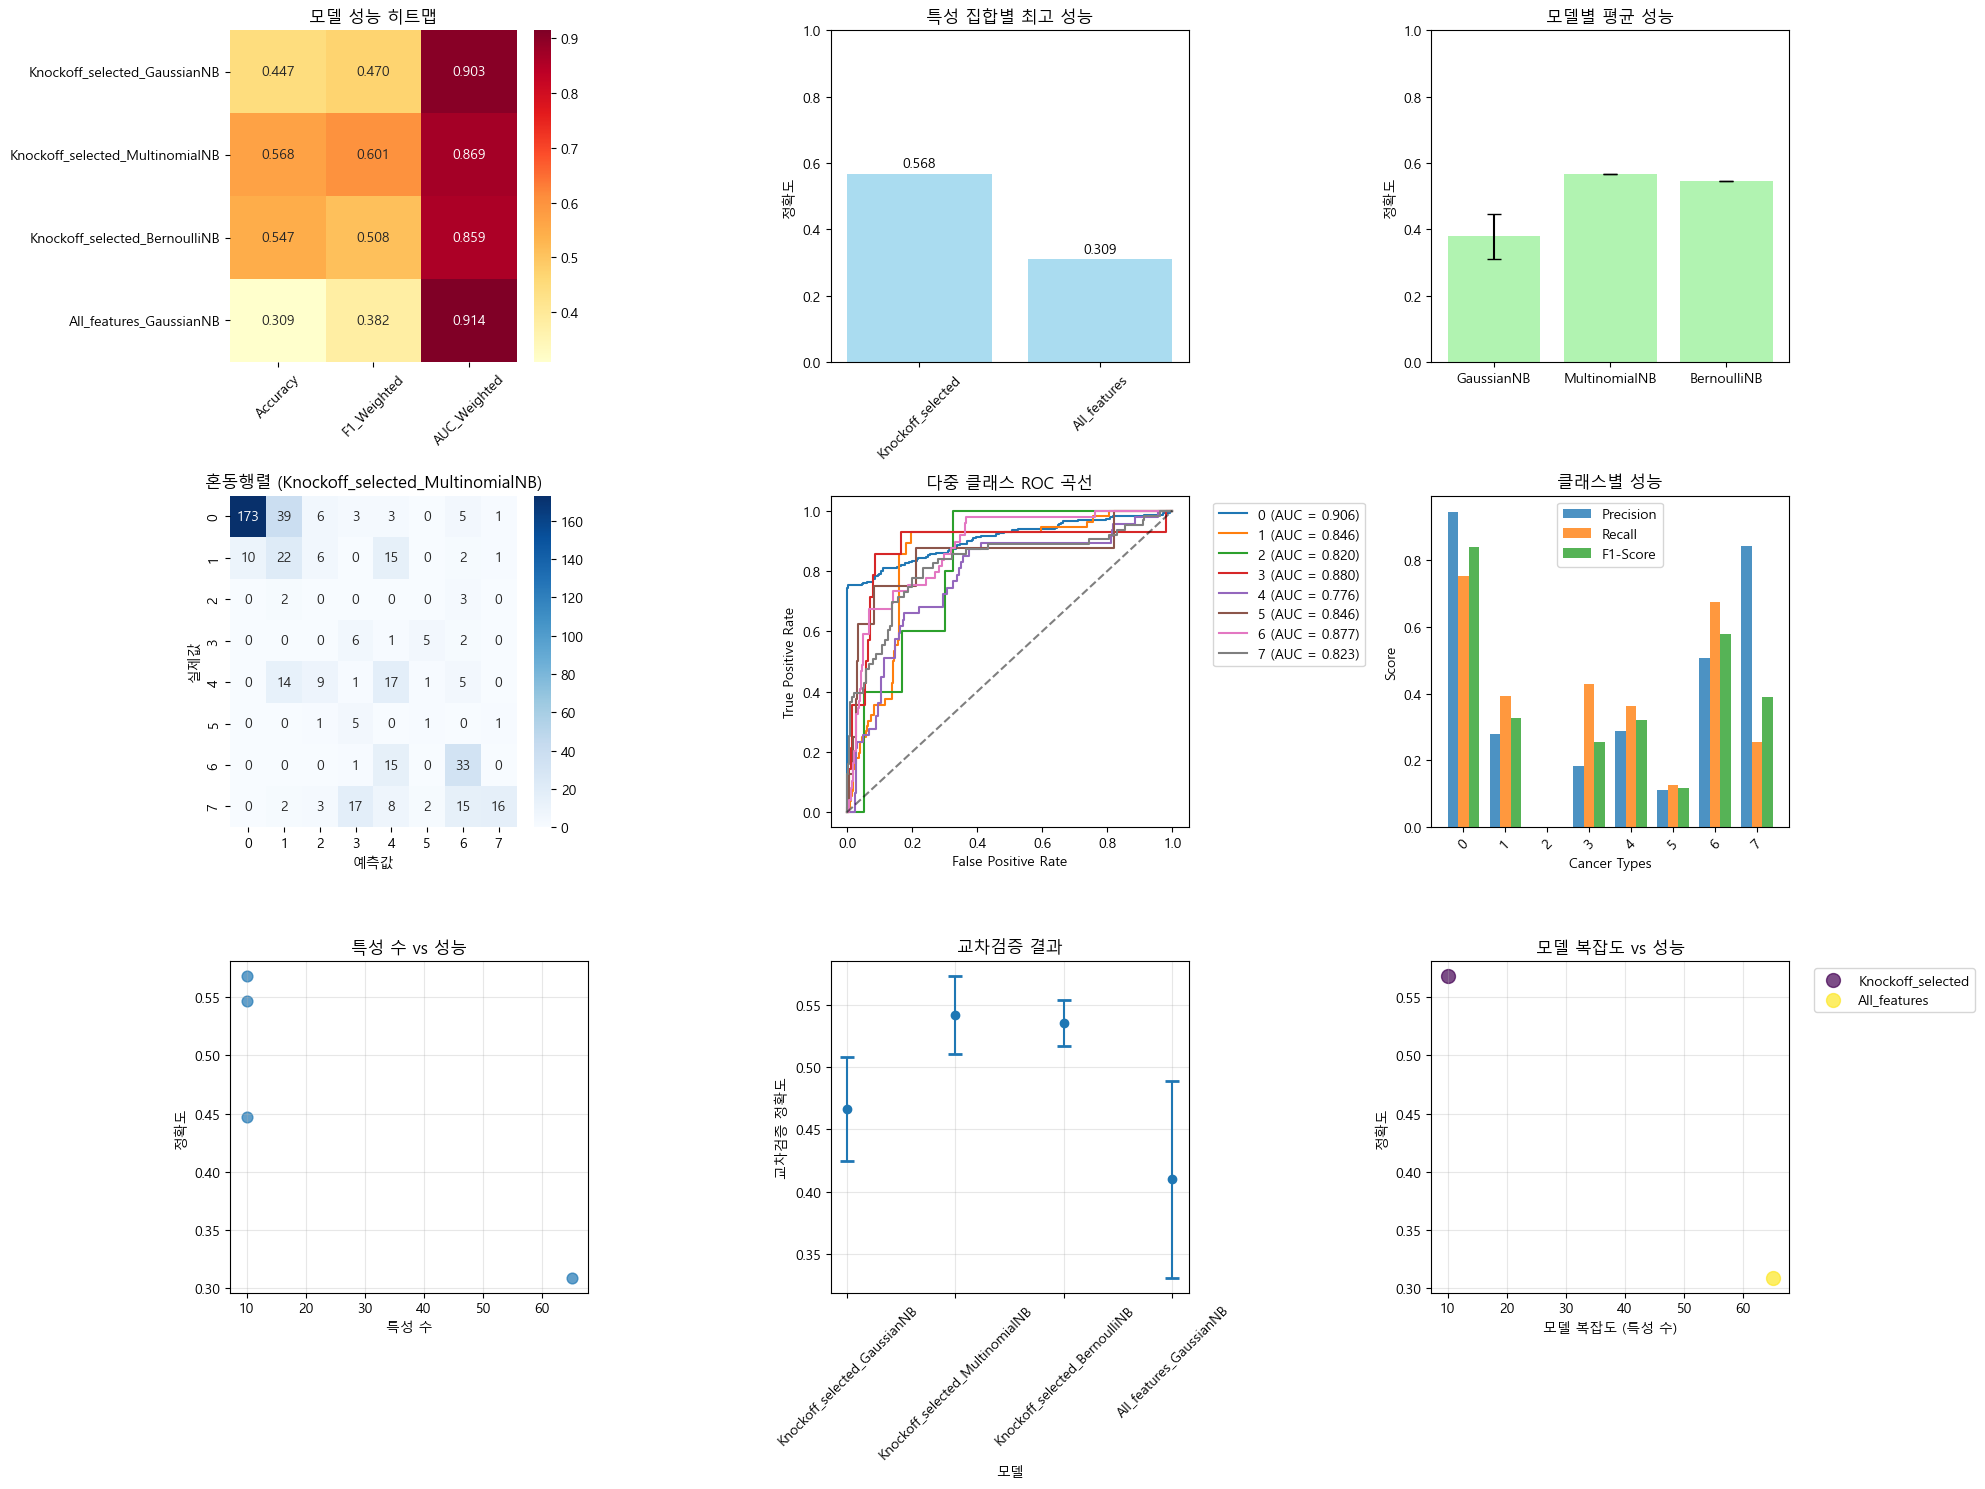


📋 5단계: 분석 리포트 생성

📊 NAIVE BAYES 다중 분류 분석 요약
📈 총 평가된 모델: 4개
📈 특성 집합: 2개
📈 타겟 클래스: 8개

📊 전체 성능 통계:
   평균 정확도: 0.4677 (±0.1022)
   최고 정확도: 0.5678
   최저 정확도: 0.3093
   평균 F1-Score: 0.4904 (±0.0783)

🏆 최고 성능 모델 상세 분석: Knockoff_selected_MultinomialNB
--------------------------------------------------
📊 전체 성능:
   정확도: 0.5678
   균형 정확도: 0.3735
   Cohen's Kappa: 0.4284
   사용된 특성 수: 10

📋 클래스별 상세 성능:
                 0 | Precision: 0.945 | Recall: 0.752 | F1: 0.838 | Support: 230
                 1 | Precision: 0.278 | Recall: 0.393 | F1: 0.326 | Support: 56
                 2 | Precision: 0.000 | Recall: 0.000 | F1: 0.000 | Support: 5
                 3 | Precision: 0.182 | Recall: 0.429 | F1: 0.255 | Support: 14
                 4 | Precision: 0.288 | Recall: 0.362 | F1: 0.321 | Support: 47
                 5 | Precision: 0.111 | Recall: 0.125 | F1: 0.118 | Support: 8
                 6 | Precision: 0.508 | Recall: 0.673 | F1: 0.579 | Support: 49
                 7 | Precision: 0.842 | Recall

In [38]:
ko_selected_features = ['Site', 'WBC', 'RBC', 'Hb', 'Hct', 'MCHC', 'PDW', 'Monocyte', 'ANC', 'SEX']
nb_classifier = run_comprehensive_naive_bayes_analysis(
    df=processed_encoded,
    knockoff_features=ko_selected_features,  # Knockoff에서 선택된 특성들
    target_col='암종'
)

# 2. 결과 내보내기
nb_classifier.export_results_to_excel('cancer_classification_results.xlsx')

# 3. 특성 중요도 분석
importance_analysis = nb_classifier.get_feature_importance_analysis()
print("상위 10개 중요 특성:")
for feature, score in importance_analysis['top_features']:
    print(f"  {feature}: {score:.4f}")